# Studi Kasus Klasifikasi


#<font color="khaki">**Import Library**</font>


In [ ]:
!pip install graphviz dtreeviz
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from dtreeviz.trees import *
import graphviz
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tqdm import tqdm

#<font color="khaki">**Import Data**</font>


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets
df = pd.concat([X, y], axis=1)

#<font color="khaki">**Penjelasan Dataset**</font>

Dataset ini berisi data mahasiswa dan bertujuan untuk memprediksi dropout, kelulusan, atau status terdaftar (enrolled) berdasarkan berbagai informasi demografis, akademik, dan faktor eksternal. Secara garis besar, dataset ini dapat dibagi menjadi beberapa kategori informasi:  

Dataset ini berisi data mahasiswa dan bertujuan untuk memprediksi dropout, kelulusan, atau status terdaftar berdasarkan berbagai informasi demografis, akademik, dan faktor eksternal. Secara garis besar, dataset ini dapat dibagi menjadi beberapa kategori informasi:

1. **Informasi Demografis dan Personal**  
Berisi data seperti status pernikahan, kewarganegaraan, jenis kelamin, usia saat pendaftaran, serta latar belakang orang tua (pendidikan dan pekerjaan).
Ada juga informasi apakah mahasiswa memiliki kebutuhan pendidikan khusus atau berasal dari luar negeri.

2. **Informasi Akademik**  
Meliputi data terkait proses pendaftaran (cara mendaftar, pilihan kursus, dll.), status keuangan (beasiswa, pembayaran uang kuliah), dan performa akademik seperti nilai masuk, jumlah mata kuliah yang diambil, dinilai, dan diluluskan di semester pertama dan kedua.
Ini membantu mengukur kinerja mahasiswa selama kuliah.

3. **Faktor Ekonomi**  
Memuat data eksternal seperti tingkat pengangguran, inflasi, dan PDB wilayah asal mahasiswa, yang dapat memengaruhi keberhasilan akademik mereka.

4. **Target**  
Variabel target adalah status akhir mahasiswa, yang dapat berupa:
     - Dropout: Mahasiswa berhenti sebelum menyelesaikan studi.
     - Graduate: Mahasiswa berhasil menyelesaikan studi.
     - Enrolled: Mahasiswa masih terdaftar.  

Penjelasan lengkap dapat dilihat di link berikut:  
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

#<font color="khaki">**Data Preparation**</font>


In [ ]:
print(df.shape)
df.head()

(4424, 37)


Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Mengubah tipe data untuk variabel kategorik

In [ ]:
for col in [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18]:
  df.iloc[:, col] = df.iloc[:, col].astype('category')

df.iloc[:, 20] = df.iloc[:, 20].astype('category')
df.iloc[:, 36] = df.iloc[:, 36].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital Status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

In [ ]:
print("Duplikasi = ", df.duplicated().sum())
print(df.isnull().sum())

Duplikasi =  0
Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                               

Tidak terdapat duplikasi dan missing value pada data. Dataset ini sendiri sudah mengalami proses preprocessing data yang ketat oleh pengunggah data untuk menangani data dari anomali, outlier yang tidak dapat dijelaskan, dan missing value. Jadi, secara tidak langsung dataset ini sebenarnya sudah merupakan data bersih.

#<font color="khaki">**EDA**</font>


## Variabel Numerik

In [ ]:
# Data mahasiswa yang mengalami Dropout
df_dropout = df[df['Target'] == 'Dropout']

In [ ]:
df.describe()

Previous qualification (grade)  Admission grade  Age at enrollment  \
count                     4424.000000      4424.000000        4424.000000   
mean                       132.613314       126.978119          23.265145   
std                         13.188332        14.482001           7.587816   
min                         95.000000        95.000000          17.000000   
25%                        125.000000       117.900000          19.000000   
50%                        133.100000       126.100000          20.000000   
75%                        140.000000       134.800000          25.000000   
max                        190.000000       190.000000          70.000000   

       Curricular units 1st sem (credited)  \
count                          4424.000000   
mean                              0.709991   
std                               2.360507   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              20.000000   

       Curricular units 1st sem (enrolled)  \
count                          4424.000000   
mean                              6.270570   
std                               2.480178   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              26.000000   

       Curricular units 1st sem (evaluations)  \
count                             4424.000000   
mean                                 8.299051   
std                                  4.179106   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 45.000000   

       Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
count                          4424.000000                       4424.000000   
mean                              4.706600                         10.640822   
std                               3.094238                          4.843663   
min                               0.000000                          0.000000   
25%                               3.000000                         11.000000   
50%                               5.000000                         12.285714   
75%                               6.000000                         13.400000   
max                              26.000000                         18.875000   

       Curricular units 1st sem (without evaluations)  \
count                                     4424.000000   
mean                                         0.137658   
std                                          0.690880   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                    

In [ ]:
df_dropout.describe()

Previous qualification (grade)  Admission grade  Age at enrollment  \
count                     1421.000000      1421.000000        1421.000000   
mean                       131.114075       124.961365          26.068966   
std                         12.873354        15.125159           8.704024   
min                         95.000000        95.000000          18.000000   
25%                        122.000000       115.000000          19.000000   
50%                        133.100000       123.600000          23.000000   
75%                        137.000000       133.000000          30.000000   
max                        190.000000       190.000000          70.000000   

       Curricular units 1st sem (credited)  \
count                          1421.000000   
mean                              0.609430   
std                               2.104695   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              18.000000   

       Curricular units 1st sem (enrolled)  \
count                          1421.000000   
mean                              5.821253   
std                               2.326304   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              21.000000   

       Curricular units 1st sem (evaluations)  \
count                             1421.000000   
mean                                 7.751583   
std                                  4.921590   
min                                  0.000000   
25%                                  5.000000   
50%                                  8.000000   
75%                                 11.000000   
max                                 31.000000   

       Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
count                          1421.000000                       1421.000000   
mean                              2.551724                          7.256656   
std                               2.857588                          6.031120   
min                               0.000000                          0.000000   
25%                               0.000000                          0.000000   
50%                               2.000000                         10.928571   
75%                               4.000000                         12.200000   
max                              21.000000                         18.000000   

       Curricular units 1st sem (without evaluations)  \
count                                     1421.000000   
mean                                         0.192118   
std                                          0.794591   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          8.000000   

       Curricular units 2nd sem (credited)  \
count                          1421.000000   
mean                              0.449683   
std                               1.679548   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              16.000000   

       Curricular units 2nd sem (enrolled)  \
count                          1421.000000   
mean                              5.780436   
std                               2.108249   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                    

Interpretasi

*   Dapat dilihat untuk kolom yang menunjukkan nilai (grade), mahasiswa yang Dropout selalu memiliki rata-rata nilai yang lebih kecil dibandingkan rata-rata nilai mahasiswa secara keseluruhan, baik nilai saat pendidikan sebelumnya atau saat penerimaan, maupun nilai pada semester satu dan dua. Artinya, **mahasiswa dengan nilai yang rendah berisiko untuk mengalami Dropout**.
*   Rata-rata jumlah SKS mahasiswa Dropout juga selalu lebih kecil jika dibandingkan mahasiswa secara kesulurhan, baik jumlah SKS maksimal, SKS yang diambil, SKS yang disetujui, maupun jumlah SKS yang dievaluasi, kecuali pada jumlah SKS yang tidak dievaluasi. Artinya, **mahasiswa dengan jumlah SKS yang sedikit (kecuali pada jumlah SKS yang tidak dievaluasi) lebih berisiko mengalami Dropout.** Kebalikannya,**mahasiswa dengan jumlah SKS yang tidak dievaluasi lebih banyak akan lebih berisiko mengalami dropout.**
*   Untuk umur saat penerimaan, mahasiswa Dropout memiliki rata-rata umur lebih besar dibandingkan mahasiswa secara keseluruhan. Artinya, **mahasiswa dengan umur yang lebih tua saat penerimaan berisiko untuk mengalami Dropout**.
*   Untuk faktor ekonominya, rata-rata wilayah tempat tinggal mahasiswa Dropout memiliki tingkat pengangguran dan inflasi yang sedikit lebih tinggi, serta rata-rata GDP yang lebih rendah dibandingkan mahasiswa secara keseluruhan.



### Feature Scaling

Dapat dilihat bahwa variabel numerik tidak memiliki skala pengukuran yang sama. Agar hal ini tidak mempengaruhi hasil klasifikasi, maka diputuskan untuk melakukan standarisasi pada variabel numerik.

In [ ]:
# Memilih kolom yang ingin distandarisasi
numerical_features = df.select_dtypes(include=['number']).columns
scaler = preprocessing.StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

Marital Status Application mode Application order Course  \
0              1               17                 5    171   
1              1               15                 1   9254   
2              1                1                 5   9070   
3              1               17                 2   9773   
4              2               39                 1   8014   

  Daytime/evening attendance Previous qualification  \
0                          1                      1   
1                          1                      1   
2                          1                      1   
3                          1                      1   
4                          0                      1   

   Previous qualification (grade) Nacionality Mother's qualification  \
0                       -0.804841           1                     19   
1                        2.076819           1                      1   
2                       -0.804841           1                     37   
3                       -0.804841           1                     38   
4                       -2.473171           1                     37   

  Father's qualification  ... Curricular units 2nd sem (credited)  \
0                     12  ...                           -0.282442   
1                      3  ...                           -0.282442   
2                     37  ...                           -0.282442   
3                     37  ...                           -0.282442   
4                     38  ...                           -0.282442   

  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  \
0                           -2.838337                               -2.042630   
1                           -0.105726                               -0.522682   
2                           -0.105726                               -2.042630   
3                           -0.105726                                0.490616   
4                           -0.105726                               -0.522682   

  Curricular units 2nd sem (approved) Curricular units 2nd sem (grade)  \
0                           -1.471527                        -1.963489   
1                            0.518904                         0.659562   
2                           -1.471527                        -1.963489   
3                            0.187165                         0.416450   
4                            0.518904                         0.531608   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                      -0.199441         -0.287638   
1                                      -0.199441          0.876222   
2                                      -0.199441         -0.287638   
3                                      -0.199441         -0.813253   
4                                      -0.199441          0.876222   

  Inflation rate       GDP    Target  
0       0.124386  0.765761   Dropout  
1      -1.105222  0.347199  Graduate  
2       0.124386  0.765761   Dropout  
3      -1.466871 -1.375511  Graduate  
4      -1.105222  0.347199  Graduate  

[5 rows x 37 columns]

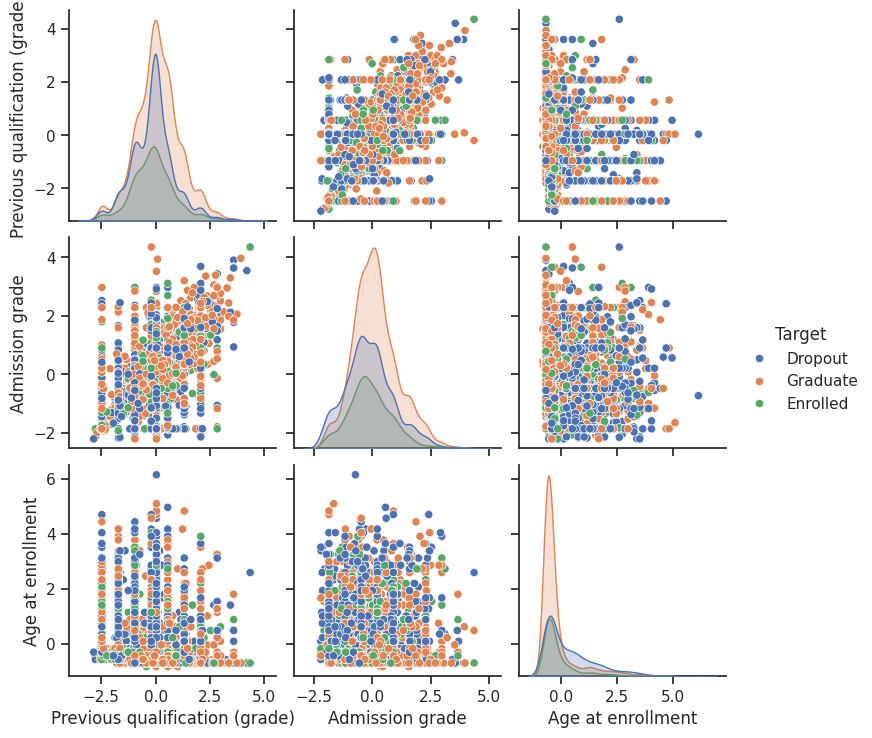

In [ ]:
sns.pairplot(df, vars=['Previous qualification (grade)', 'Admission grade', 'Age at enrollment'], hue='Target')
plt.show()

Interpretasi

Sekilas terlihat ada **hubungan linier positif antara previous grade dan admission grade**, umumnya semakin tinggi nilai yang dimiliki pada pendidikan sebelumnya maka akan nilai pada saat penerimaan akan tinggi pula, tetapi hal ini **tidak berlaku pada semua mahasiswa**.

### Semester

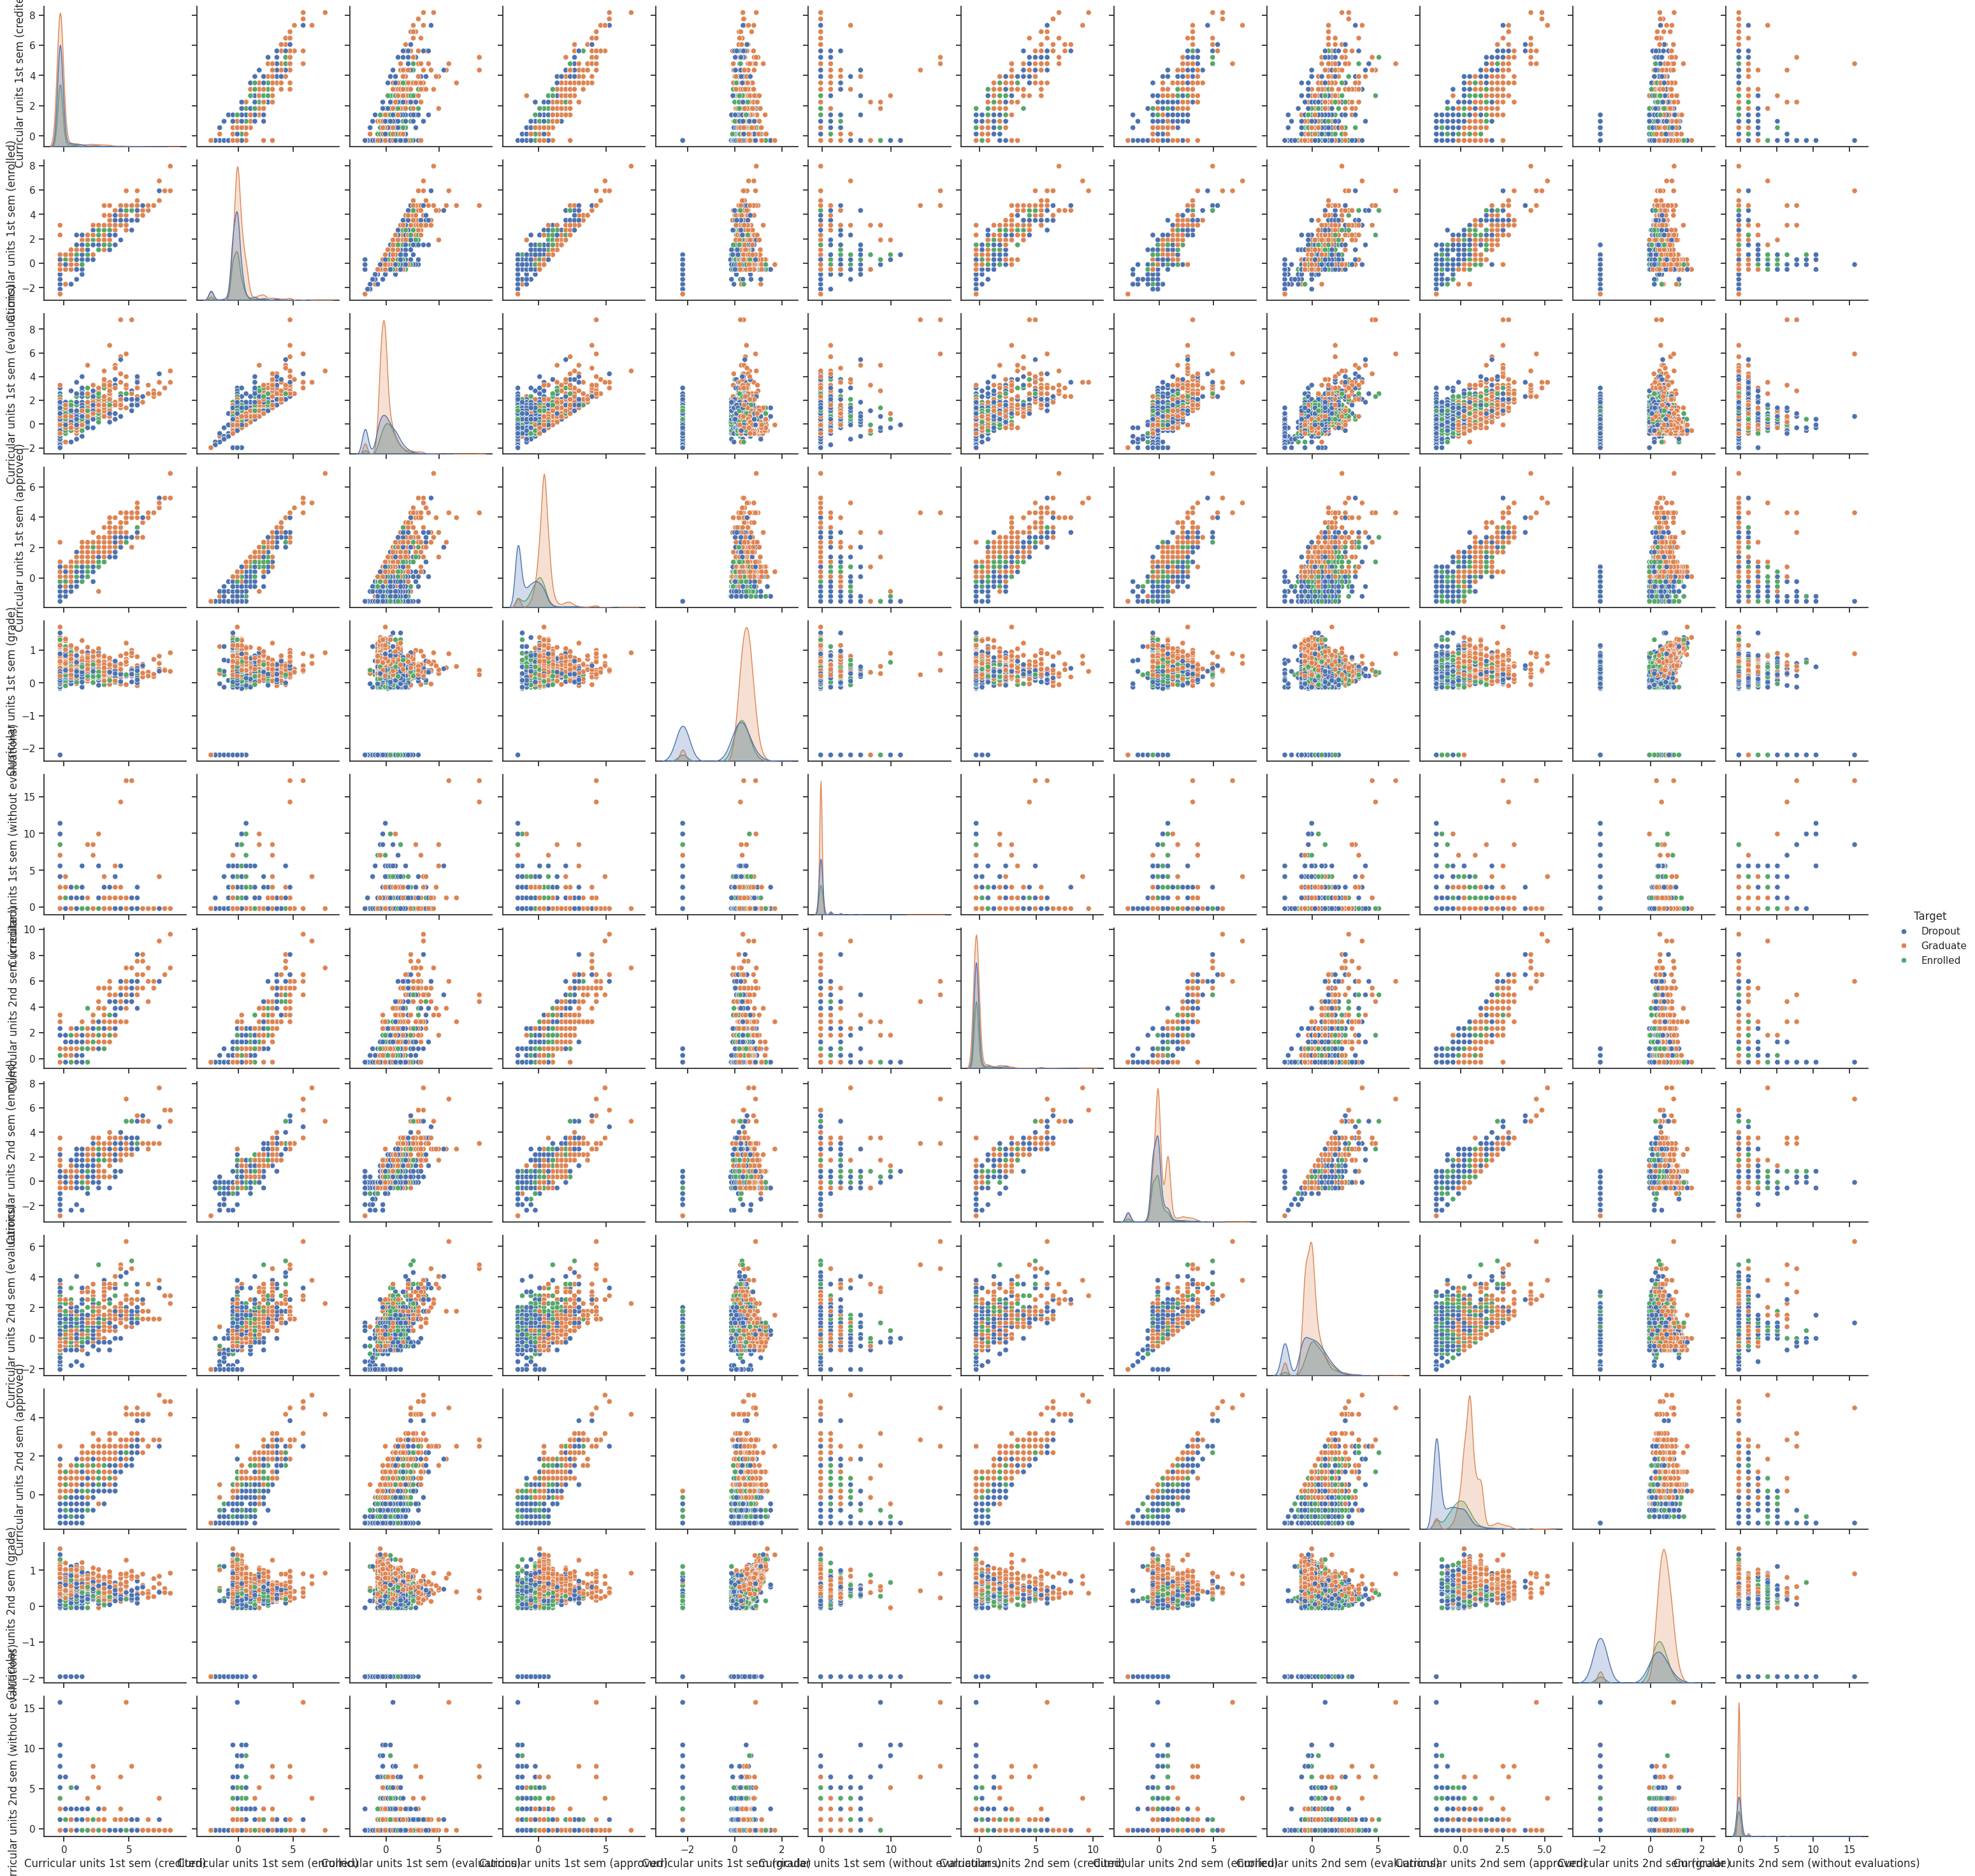

In [ ]:
sns.pairplot(df, vars=['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                       'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                      'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                       'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                      'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                      'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'], hue='Target')
plt.show()

Interpretasi
*   Terdapat hubungan linier positif (semakin meningkat suatu variabel maka variabel lainnya juga akan meningkat) antara
    * Jumlah SKS maksimal pada semester 1 dengan semua variabel semester  kecuali variabel nilai pada semester 1 dan 2, serta jumlah SKS yang tidak dievaluasi pada semester 1 dan 2. Begitupun sebaliknya.
    * Jumlah SKS yang diambil pada semester 1 dengan semua variabel semester kecuali variabel nilai pada semester 1 dan 2, serta jumlah SKS yang tidak dievaluasi pada semester 1 dan 2. Begitupun sebaliknya.
    * Jumlah SKS yang dievaluasi pada semester 1 dengan semua variabel semester kecuali variabel nilai pada semester 1 dan 2, serta jumlah SKS yang tidak dievaluasi pada semester 1 dan 2. Begitupun sebaliknya.
    * Jumlah SKS yang disetujui pada semester 1 dengan semua variabel semester kecuali variabel nilai pada semester 1 dan 2, serta jumlah SKS yang tidak dievaluasi pada semester 1 dan 2. Begitupun sebaliknya.
*   Bisa dilihat bahwa umumnya titik biru yang melambangkan mahasiswa Dropout tersebar pada bagian bawah atau kiri kecil dari masing-masing variabel (kecuali pada variabel jumlah sks yang dievaluasi di semester 1 dan 2), artinya **mahasiswa dropout cenderung memiliki nilai yang kecil pada variabel semester (kecuali pada variabel jumlah sks yang tidak dievaluasi di semester 1 dan 2)**. Sedangkan titik orange yang melambangkan mahasiswa Graduate tersebar pada bagian atas atau kanan (kecuali pada variabel jumlah sks yang tidak dievaluasi di semester 1 dan 2), artinya **mahasiswa graduate cenderung memiliki nilai yang besar pada variabel semester (kecuali pada variabel jumlah sks yang tidak dievaluasi di semester 1 dan 2)**. Hal ini sejalan dengan temuan pada analisis deskriptif bahwa mahasiswa dropout memiliki rata-rata yang rendah baik pada variabel nilai maupun variabel jumlah SKS (kecuali pada variabel jumlah sks yang tidak dievaluasi di semester 1 dan 2).



### Ekonomi Wilayah

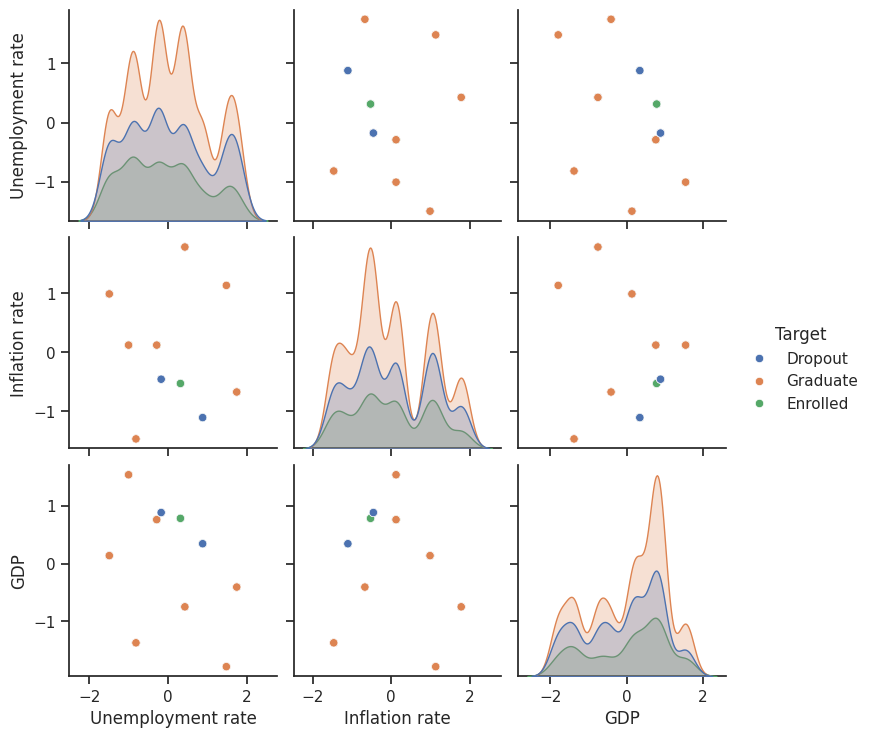

In [ ]:
sns.pairplot(df, vars=['Unemployment rate',	'Inflation rate',	'GDP'], hue='Target')
plt.show()

Interpretasi

Dapat dilihat bahwa tidak terdapat pola khusus dalam grafik di atas. Graduate tersebar secara acak pada seluruh variabel sehingga Dropout berada dalam rentang yang sama dengan Graduate untuk hampir semua variabel. Artinya, dapat disimpulkan bahwa **faktor ekonomi wilayah seperti Unemployment rate, Inflation rate, dan GDP tidak memberikan pengaruh yang signifikan terhadap klasifikasi keberhasilan akademik mahasiswa**.

## Variabel Kategorik

### Marital Status

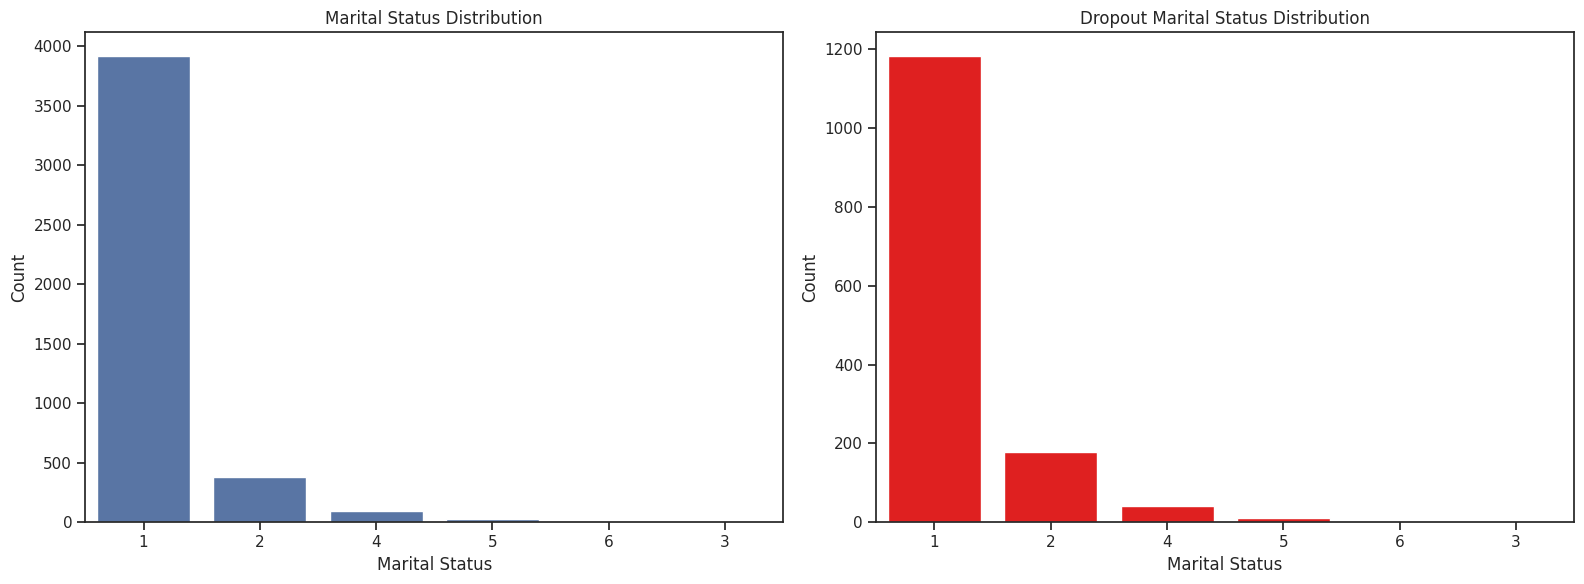

In [ ]:
# Membuat figure dan axes untuk dua plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Menghitung jumlah untuk setiap kategori di df dan df_dropout
count_df = df['Marital Status'].value_counts()
count_dropout_df = df_dropout['Marital Status'].value_counts()

# Mengambil kategori yang memiliki count lebih dari 0
valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

# Plot pertama untuk distribusi status pernikahan
sns.countplot(x='Marital Status', data=df[df['Marital Status'].isin(valid_categories)], order=valid_categories, ax=ax1)
ax1.set_title('Marital Status Distribution')
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')

# Plot kedua untuk distribusi status pernikahan dropout
sns.countplot(x='Marital Status', data=df_dropout[df_dropout['Marital Status'].isin(valid_categories_dropout)], order=valid_categories_dropout, ax=ax2, color='Red')
ax2.set_title('Dropout Marital Status Distribution')
ax2.set_xlabel('Marital Status')
ax2.set_ylabel('Count')

# Menampilkan plot
plt.tight_layout()
plt.show()

Interpretasi

Umumnya status pernikahan pada mahasiswa secara keseluruhan maupun mahasiswa Dropout berada pada kategori single (1). Jarang sekali terdapat mahasiswa yang sudah berpisah secara legal (6) atau berstatus janda/duda (3).

### Application Mode

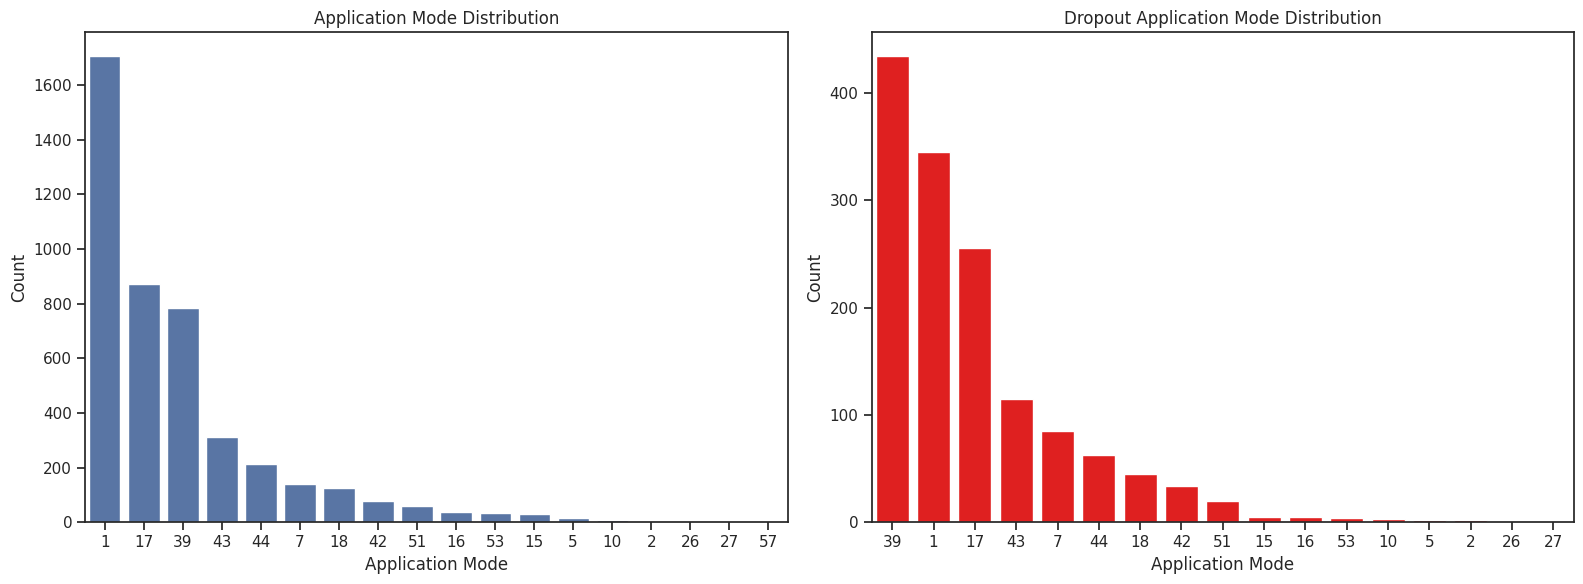

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Menghitung jumlah untuk setiap kategori di df dan df_dropout
count_df = df['Application mode'].value_counts()
count_dropout_df = df_dropout['Application mode'].value_counts()

# Mengambil kategori yang memiliki count lebih dari 0
valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

# Plot 1
sns.countplot(x='Application mode', data=df[df['Application mode'].isin(valid_categories)], order=valid_categories, ax=ax1)
ax1.set_title('Application Mode Distribution')
ax1.set_xlabel('Application Mode')
ax1.set_ylabel('Count')

# Plot 2
sns.countplot(x='Application mode', data=df_dropout[df_dropout['Application mode'].isin(valid_categories_dropout)], order=valid_categories_dropout, ax=ax2, color='Red')
ax2.set_title('Dropout Application Mode Distribution')
ax2.set_xlabel('Application Mode')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

Interpretasi

Umumnya mahasiswa secara keseluruhan mendaftar menggunakan jalur pendaftaran 1st phase - general contingent (pendataran fase pertama untuk umum). Sedangkan mahasiswa Dropout umumnya mendaftar menggunakan jalur over 23 years old (pendaftar di atas umur 23 tahun), hal ini sejalan dengan penemuan sebelumnya bahwa rata-rata umur mahasiswa Dropout saat penerimaan lebih tinggi dibandingkan mahasiswa secara keseluruhan. Artinya, jalur pendaftaran mungkin mempengaruhi keberhasilan mahasiswa, **mahasiswa dengan jalur pendaftaran over 23 years old (pendaftar di atas umur 23 tahun) lebih berisiko mengalami dropout**.

### Application Order

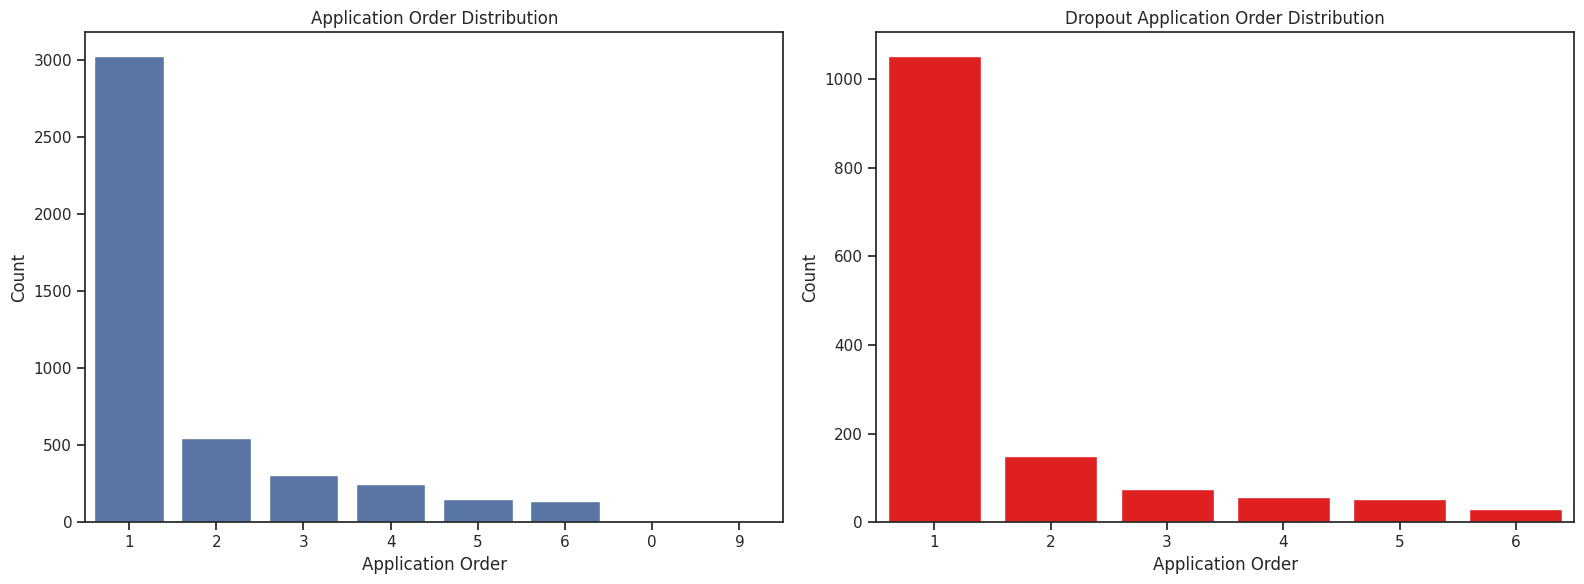

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Menghitung jumlah untuk setiap kategori di df dan df_dropout
count_df = df['Application order'].value_counts()
count_dropout_df = df_dropout['Application order'].value_counts()

# Mengambil kategori yang memiliki count lebih dari 0
valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

# Plot 1
sns.countplot(x='Application order', data=df[df['Application order'].isin(valid_categories)], order=valid_categories, ax=ax1)
ax1.set_title('Application Order Distribution')
ax1.set_xlabel('Application Order')
ax1.set_ylabel('Count')

# Plot 2
sns.countplot(x='Application order', data=df_dropout[df_dropout['Application order'].isin(valid_categories_dropout)], order=valid_categories_dropout, ax=ax2, color='Red')
ax2.set_title('Dropout Application Order Distribution')
ax2.set_xlabel('Application Order')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

Interpretasi

Baik mahasiswa secara keseluruhan maupun mahasiwa Dropout paling banyak diterima pada universitas pilihan keduanya (1). Untuk mahasiswa Dropout tidak ada yang diterima di universitas pilihan pertamanya (0) atau pilihan terakhirnya (9).

### Course

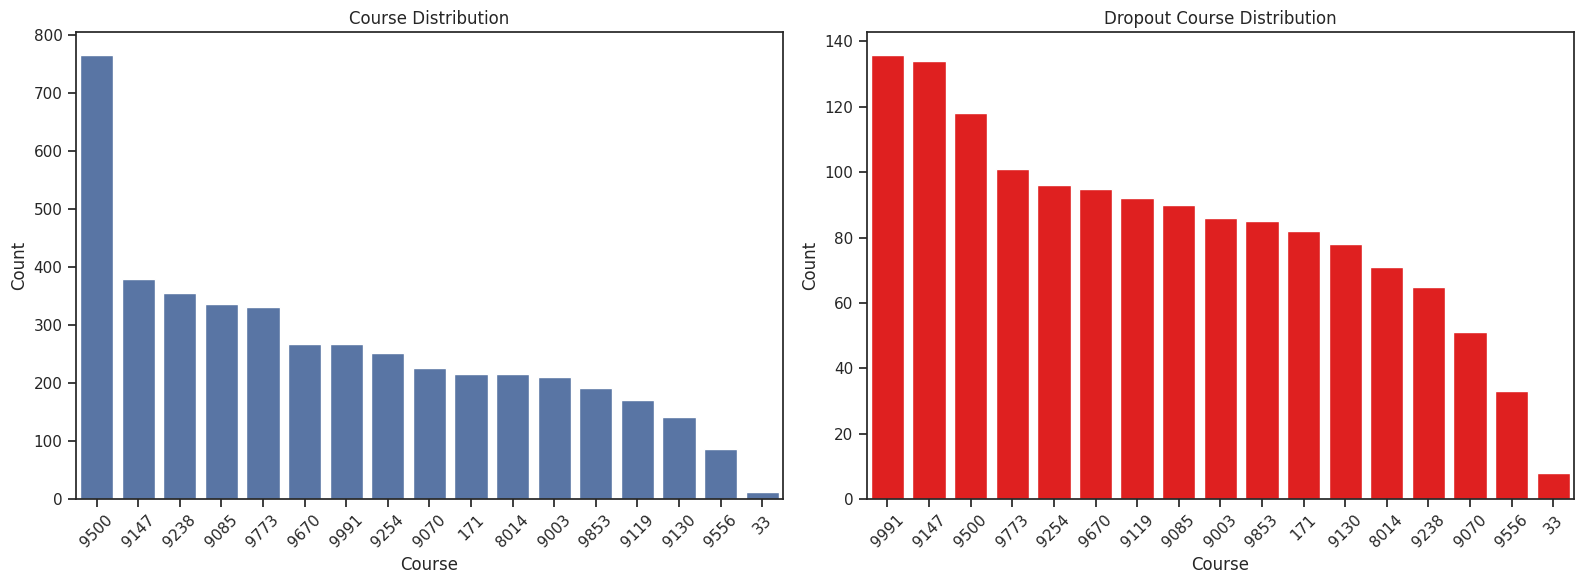

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

count_df = df['Course'].value_counts()
count_dropout_df = df_dropout['Course'].value_counts()

valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

sns.countplot(x='Course', data=df[df['Course'].isin(valid_categories)], order=valid_categories, ax=ax1)
ax1.set_title('Course Distribution')
ax1.set_xlabel('Course')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)  # Merotasi x-axis label agar lebih jelas terlihat

sns.countplot(x='Course', data=df_dropout[df_dropout['Course'].isin(valid_categories_dropout)], order=valid_categories_dropout, ax=ax2, color='Red')
ax2.set_title('Dropout Course Distribution')
ax2.set_xlabel('Course')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Interpretasi

Secara kesulurahan mahasiswa umumnya memiliki program studi nursing (9500), tetapi mahasiwa Dropout paling banyak berasal dari program studi manajemen yang kelas malam (9991). Dilihat dari secara keseluruhan jumlah mahasiswa program studi manajemen yang kelas malam (9991) berada pada sekitar 270 dan jumlah mahasiswa Dropout yang berasal dari program studi tersebut hampir mencapai 140, bisa dibilang setengah mahasiswa prodi tersebut mengalami Dropout. Dapat kita simpulkan bahwa **mahasiswa dengan program studi manajemen kelas malam lebih berisiko mengalami dropout, dibandingkan prodi lain**.

### Attendance

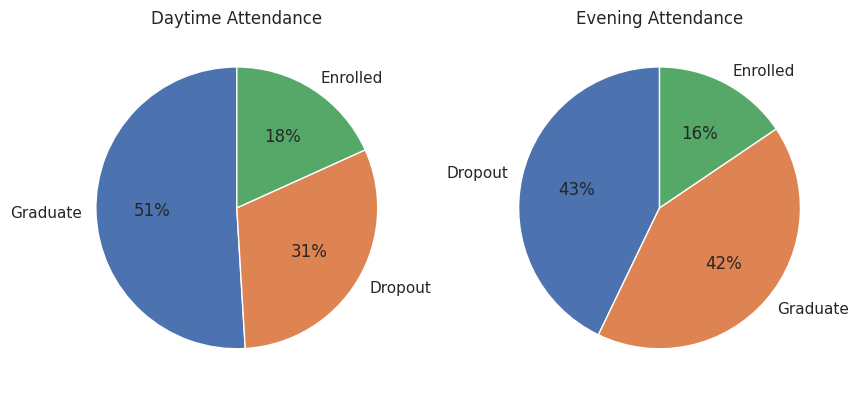

In [ ]:
# Buat dataframe yang berbeda untuk setiap kategori
df_attendance_0 = df[df['Daytime/evening attendance'] == 0]
df_attendance_1 = df[df['Daytime/evening attendance'] == 1]

# Hitung jumlah data setiap kategori
attendance_0_count = len(df_attendance_0)
attendance_1_count = len(df_attendance_1)

# Buat pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk daytime
target_counts_1 = df_attendance_1['Target'].value_counts()
ax1.pie(target_counts_1, labels=target_counts_1.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Daytime Attendance')

# Pie chart untuk evening
target_counts_0 = df_attendance_0['Target'].value_counts()
ax2.pie(target_counts_0, labels=target_counts_0.index, autopct='%1.0f%%', startangle=90)
ax2.set_title('Evening Attendance')

plt.show()

Interpretasi

Mahasiswa yang menghadiri kelas pagi memiliki proporsi kelulusan (Graduate) yang lebih banyak dibandingkan Dropout. Sedangkan mahasiswa yang menghadiri kelas malam memiliki proporsi Dropout sedikit lebih banyak dibandingkan mahasiswa yang lulus (Graduate), meskipun perbedaannya hanya sedikit, tetapi jika dibandingkan dengan proporsi kelulusan dan dropout mahasiswa yang menghadiri kelas pagi, proporsi dropout cukup meningkat dan proporsi kelulusan cukup menurun pada kelas malam. Hal ini sejalan dengan temuan sebelumnya bahwa mahasiswa Dropout paling banyak berasal dari program studi manajemen kelas malam (9991). Dengan demikian, dapat disimpulkan bahwa **mahasiswa yang mengambil kelas malam lebih berisiko mengalami dropout, jika dibandingkan mahasiswa kelas pagi**.

### Previous Qualification

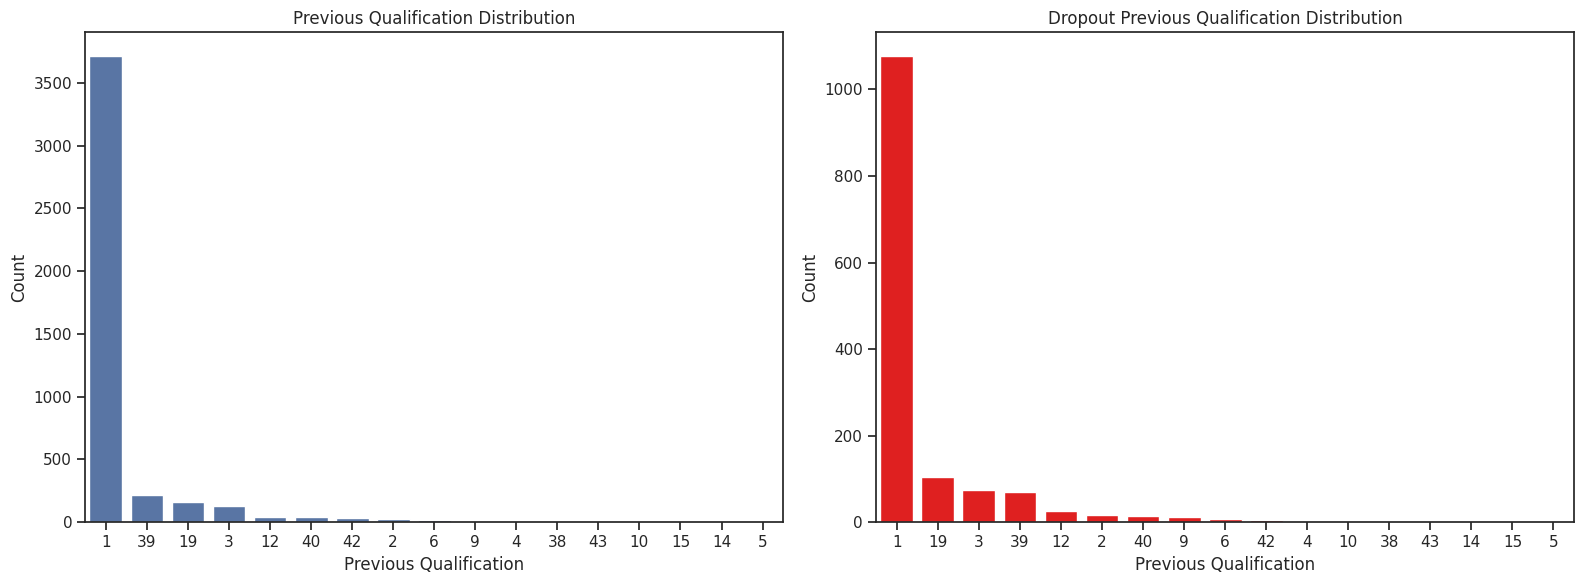

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

count_df = df['Previous qualification'].value_counts()
count_dropout_df = df_dropout['Previous qualification'].value_counts()

valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

sns.countplot(x='Previous qualification', data=df[df['Previous qualification'].isin(valid_categories)], order=valid_categories, ax=ax1)
ax1.set_title('Previous Qualification Distribution')
ax1.set_xlabel('Previous Qualification')
ax1.set_ylabel('Count')

sns.countplot(x='Previous qualification', data=df_dropout[df_dropout['Previous qualification'].isin(valid_categories_dropout)], order=valid_categories_dropout, ax=ax2, color='Red')
ax2.set_title('Dropout Previous Qualification Distribution')
ax2.set_xlabel('Previous Qualification')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

Interpretasi

Baik secara keseluruhan maupun Dropout, jenjang pendidikan mahasiswa sebelum penerimaan paling banyak berasal dari secondary education (1). Hal ini tentu wajar karena biasanya mahasiswa sebelum memasuki perkuliahan harus menempuh pendidikan SMP dan SMA terlebih dahulu. Perbedaannya adalah pada mahasiswa secara keseluruhan jenjang pendidikan yang menempati posisi kedua terbanyak adalah technological specialization course (39), sedangkan pada mahasiswa Dropout adalah basic education 3rd cycle (9th/10th/11th year) or equivalen (19). Artinya, **mahasiswa dengan jenjang pendidikan sebelumnya basic education 3rd cycle (9th/10th/11th year) or equivalen lebih berisiko Dropout dibandingkan mahasiswa dengan jenjang pendidikan technological specialization course**.

### Nationality

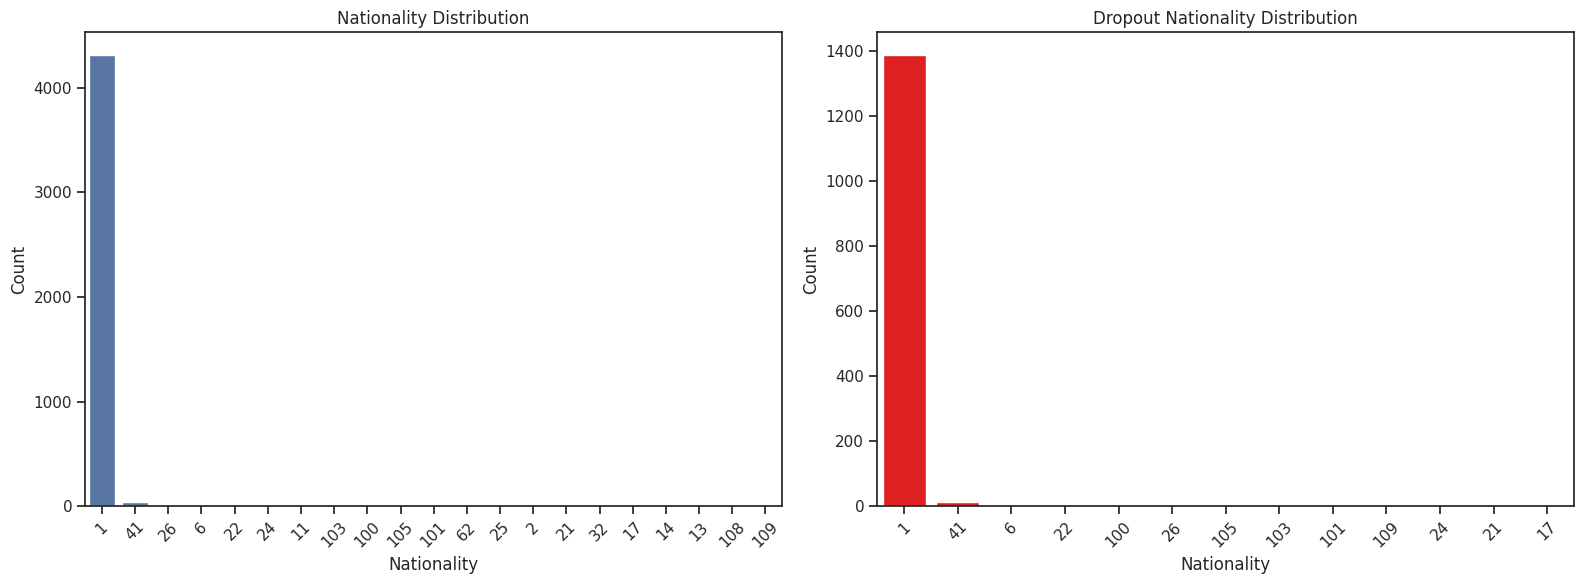

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Menghitung jumlah untuk setiap kategori di df dan df_dropout
count_df = df['Nacionality'].value_counts()
count_dropout_df = df_dropout['Nacionality'].value_counts()

# Mengambil kategori yang memiliki count lebih dari 0
valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

sns.countplot(x='Nacionality', data=df[df['Nacionality'].isin(valid_categories)], order=valid_categories, ax=ax1)
ax1.set_title('Nationality Distribution')
ax1.set_xlabel('Nationality')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

sns.countplot(x='Nacionality', data=df_dropout[df_dropout['Nacionality'].isin(valid_categories_dropout)], order=valid_categories_dropout, ax=ax2, color='Red')
ax2.set_title('Dropout Nationality Distribution')
ax2.set_xlabel('Nationality')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Interpretasi

Mahasiswa secara keseluruhan umumnya memiliki kewarganegaraan Portuguese (1), begitu pula dengan mahasiswa yang Dropout. Bebeberapa kewarganegaraan seperti Italian (11), Dutch (13), English (14), dll tidak memiliki mahasiswa yang Dropout, hal ini bisa terjadi karena memang jumlah mahasiswa dengan kewarganegaraan tersebut pada dasarnya sedikit sekali bahkan bisa jadi hanya satu. Dari grafik tersebut dapat disimpulkan bahwa **kewarganegaraan tidak memperngaruhi keberhasilan akademik mahasiswa**.

### Mother's Qualification

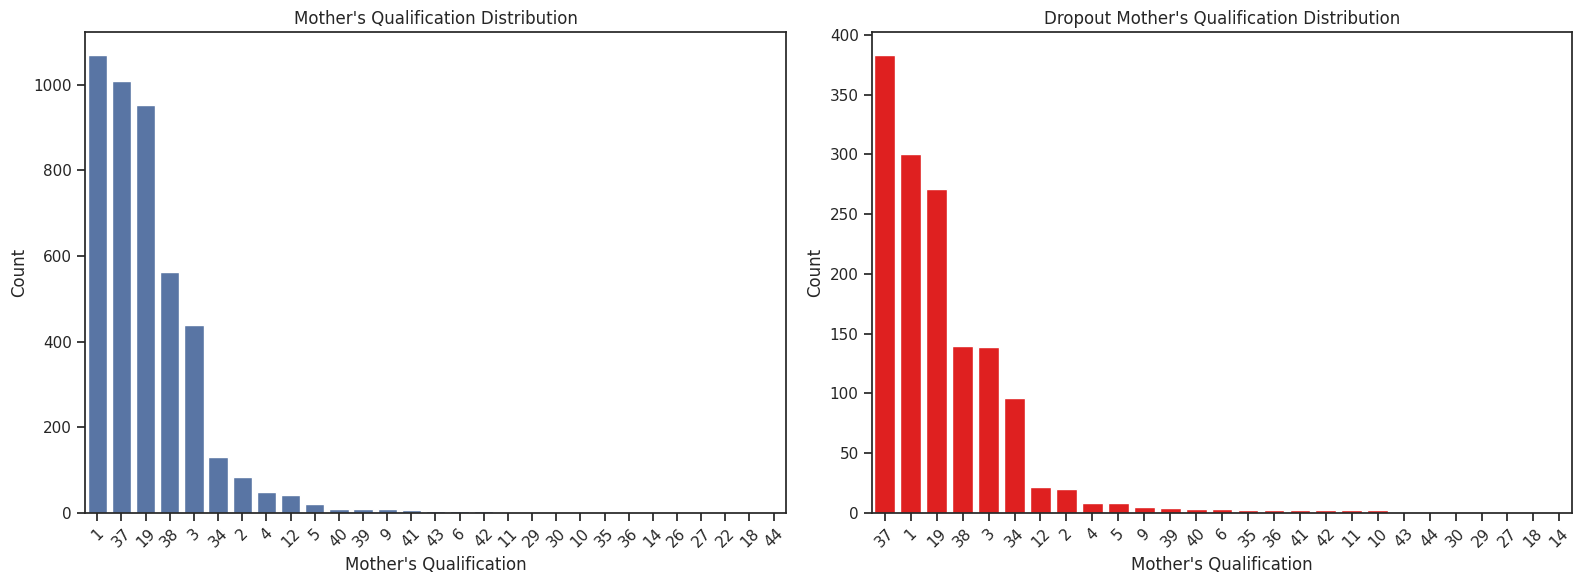

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Menghitung jumlah untuk setiap kategori di df dan df_dropout
count_df = df["Mother's qualification"].value_counts()
count_dropout_df = df_dropout["Mother's qualification"].value_counts()

# Mengambil kategori yang memiliki count lebih dari 0
valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

sns.countplot(
    x="Mother's qualification",
    data=df[df["Mother's qualification"].isin(valid_categories)],
    order=valid_categories,
    ax=ax1,
)
ax1.set_title("Mother's Qualification Distribution")
ax1.set_xlabel("Mother's Qualification")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=45)

sns.countplot(
    x="Mother's qualification",
    data=df_dropout[df_dropout["Mother's qualification"].isin(valid_categories_dropout)],
    order=valid_categories_dropout,
    ax=ax2,
    color="Red",
)
ax2.set_title("Dropout Mother's Qualification Distribution")
ax2.set_xlabel("Mother's Qualification")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Interpretasi

Jenjang pendidikan yang dimiliki oleh ibu mahasiswa secara keseluruhan paling banyak adalah secondary education (1), sedangkan untuk mahasiswa Dropout paling banyak adalah basic education 1st cycle (4th/5th year) or equivalen (37). Artinya, **mahasiswa dengan jenjang pendidikan ibunya basic education 1st cycle (4th/5th year) or equivalen lebih berisiko mengalami dropout dibandingkan dengan mahasiswa yang pendidikan ibunya adalah secondary education**.

### Father's Qualification

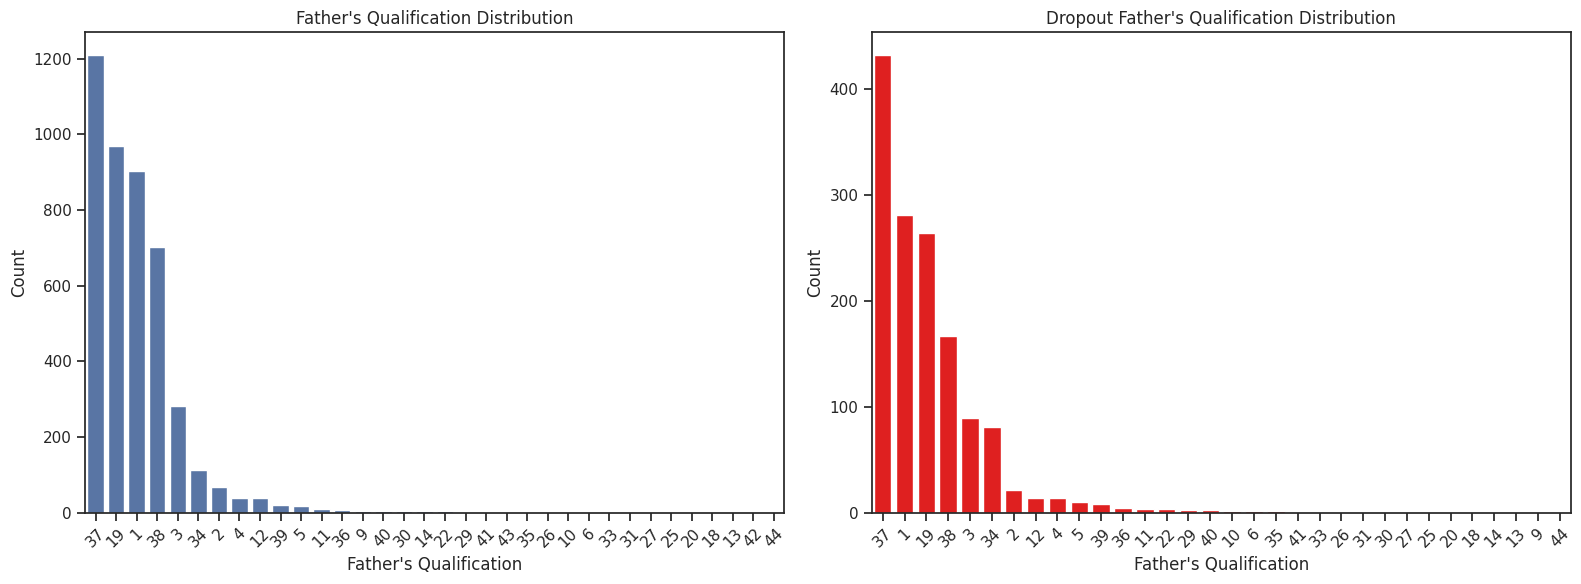

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Menghitung jumlah untuk setiap kategori di df dan df_dropout
count_df = df["Father's qualification"].value_counts()
count_dropout_df = df_dropout["Father's qualification"].value_counts()

# Mengambil kategori yang memiliki count lebih dari 0
valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

sns.countplot(
    x="Father's qualification",
    data=df[df["Father's qualification"].isin(valid_categories)],
    order=valid_categories,
    ax=ax1,
)
ax1.set_title("Father's Qualification Distribution")
ax1.set_xlabel("Father's Qualification")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=45)

sns.countplot(
    x="Father's qualification",
    data=df_dropout[df_dropout["Father's qualification"].isin(valid_categories_dropout)],
    order=valid_categories_dropout,
    ax=ax2,
    color="Red",
)
ax2.set_title("Dropout Father's Qualification Distribution")
ax2.set_xlabel("Father's Qualification")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Interpretasi

Baik secara keseluruhan maupun Dropout, jenjang pendidikan ayah mahasiswa paling banyak berasal dari basic education 1st cycle (4th/5th year) or equivalen (37). Perbedaannya adalah pada ayah mahasiswa secara keseluruhan jenjang pendidikan yang menempati posisi kedua terbanyak adalah basic education 3rd Cycle (9th/10th/11th Year) or equivalen (19), sedangkan pada mahasiswa Dropout adalah secondary education (1). Artinya, **mahasiswa dengan jenjang pendidikan sebelumnya secondary education lebih berisiko Dropout dibandingkan mahasiswa dengan jenjang pendidikan basic education 3rd Cycle (9th/10th/11th Year) or equivalen**.

### Mother's Occupation

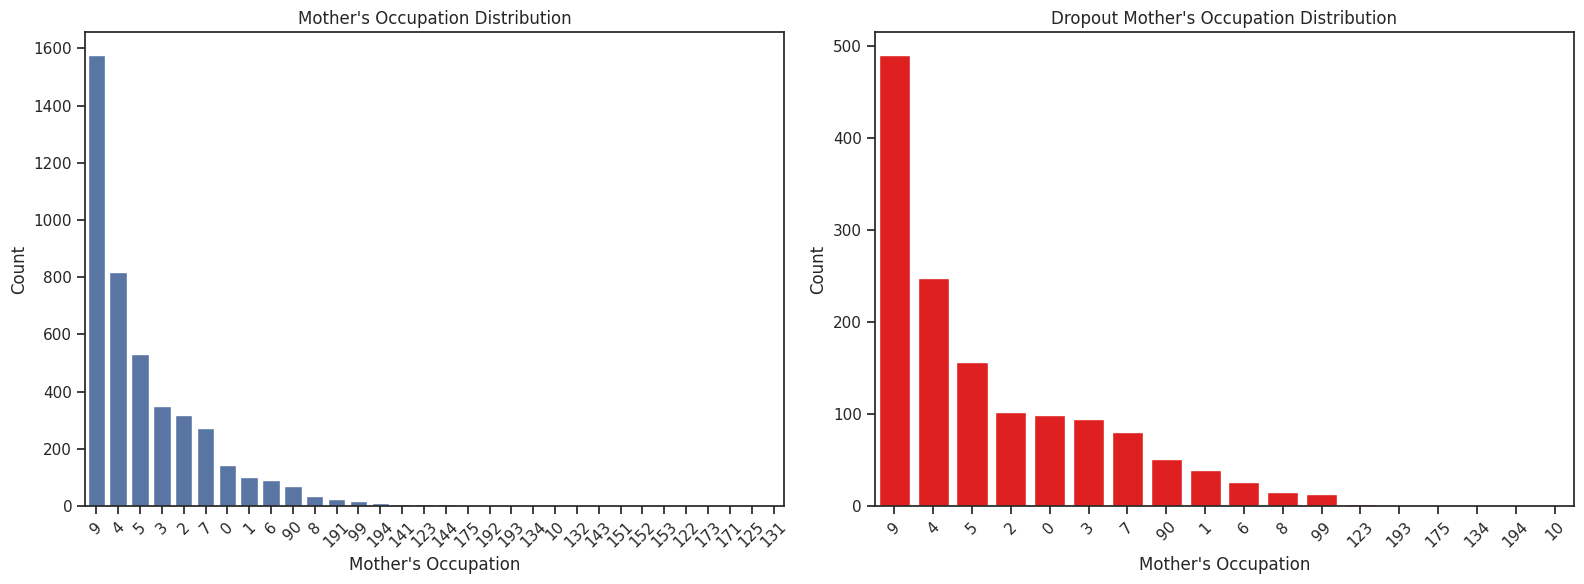

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Menghitung jumlah untuk setiap kategori di df dan df_dropout
count_df = df["Mother's occupation"].value_counts()
count_dropout_df = df_dropout["Mother's occupation"].value_counts()

# Mengambil kategori yang memiliki count lebih dari 0
valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

sns.countplot(
    x="Mother's occupation",
    data=df[df["Mother's occupation"].isin(valid_categories)],
    order=valid_categories,
    ax=ax1,
)
ax1.set_title("Mother's Occupation Distribution")
ax1.set_xlabel("Mother's Occupation")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=45)

sns.countplot(
    x="Mother's occupation",
    data=df_dropout[df_dropout["Mother's occupation"].isin(valid_categories_dropout)],
    order=valid_categories_dropout,
    ax=ax2,
    color="Red",
)
ax2.set_title("Dropout Mother's Occupation Distribution")
ax2.set_xlabel("Mother's Occupation")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Interpretasi

Mahasiswa secara keseluruhan umumnya memiliki ibu yang berprofesi sebagai unskilled workers* (9), begitu pula dengan mahasiswa yang Dropout. Bebeberapa profesi ibu seperti Data, accounting, statistical, financial services and registry-related operators (143), Other administrative support staff (144), personal service workers (151), dll tidak terdapat pada profesi ibu mahasiswa yang Dropout, hal ini bisa terjadi karena memang jumlah ibu dengan profesi tersebut pada dasarnya sedikit sekali bahkan bisa jadi hanya satu. Secara umum dapat disimpulkan bahwa **profesi ibu tidak memiliki pengaruh yang signifikan terhadap keberhasilan akademik mahasiswa**.


\
*Unskilled workers adalah pekerja yang melakukan tugas yang tidak memerlukan pelatihan, pendidikan, atau keterampilan khusus. (sumber: https://www.allvoices.co/glossary/unskilled-worker)

### Father's Occupation

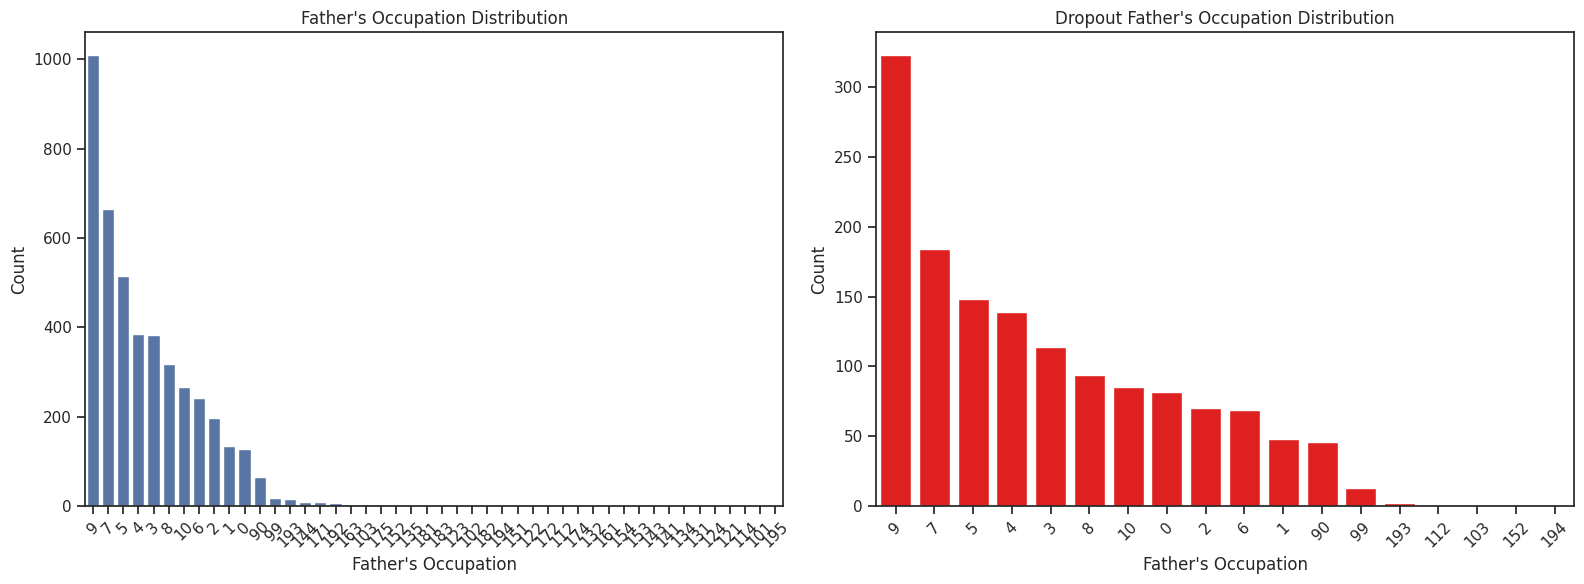

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Menghitung jumlah untuk setiap kategori di df dan df_dropout
count_df = df["Father's occupation"].value_counts()
count_dropout_df = df_dropout["Father's occupation"].value_counts()

# Mengambil kategori yang memiliki count lebih dari 0
valid_categories = count_df[count_df > 0].index.tolist()
valid_categories_dropout = count_dropout_df[count_dropout_df > 0].index.tolist()

sns.countplot(
    x="Father's occupation",
    data=df[df["Father's occupation"].isin(valid_categories)],
    order=valid_categories,
    ax=ax1,
)
ax1.set_title("Father's Occupation Distribution")
ax1.set_xlabel("Father's Occupation")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=45)

sns.countplot(
    x="Father's occupation",
    data=df_dropout[df_dropout["Father's occupation"].isin(valid_categories_dropout)],
    order=valid_categories_dropout,
    ax=ax2,
    color="Red",
)
ax2.set_title("Dropout Father's Occupation Distribution")
ax2.set_xlabel("Father's Occupation")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Interpretasi

Hampir sama seperti profesi ibu sebelumnya. Mahasiswa secara keseluruhan umumnya memiliki ayah yang berprofesi sebagai unskilled workers* (9), begitu pula dengan mahasiswa yang Dropout. Bebeberapa profesi ayah seperti Data, accounting, statistical, financial services and registry-related operators (143), Other administrative support staff (144), personal service workers (151), dll tidak terdapat pada profesi ayah mahasiswa yang Dropout, hal ini bisa terjadi karena memang jumlah ayah dengan profesi tersebut pada dasarnya sedikit sekali bahkan bisa jadi hanya satu. Perbedaan dengan profesi ibu sebelumnya mungkin hanya pada keragaman profesinya, profesi yang dimiliki ayah mahasiswa lebih beragam dibandingkan profesi yang dimiliki ibu mahasiswa. Secara umum dapat disimpulkan bahwa **profesi ayah tidak memiliki pengaruh yang signifikan terhadap keberhasilan akademik mahasiswa**.


\
*Unskilled workers adalah pekerja yang melakukan tugas yang tidak memerlukan pelatihan, pendidikan, atau keterampilan khusus. (sumber: https://www.allvoices.co/glossary/unskilled-worker)

### Displaced

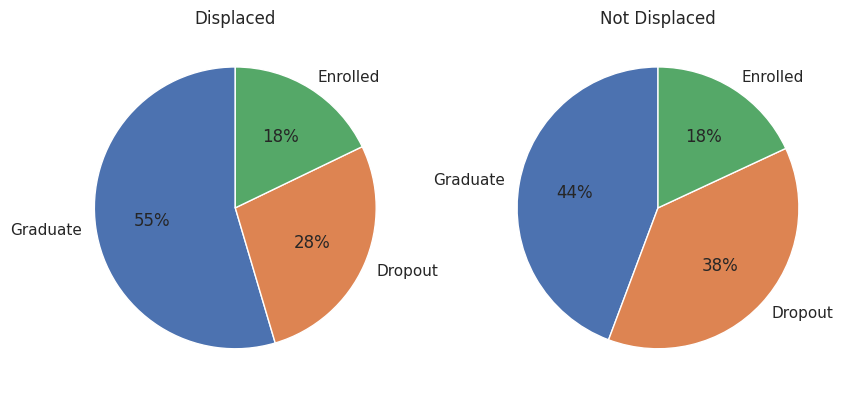

In [ ]:
# Buat dataframe yang berbeda untuk setiap kategori
df_displaced_0 = df[df['Displaced'] == 0]
df_displaced_1 = df[df['Displaced'] == 1]

# Hitung jumlah data setiap kategori
displaced_0_count = len(df_displaced_0)
displaced_1_count = len(df_displaced_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Displaced
target_counts_1 = df_displaced_1['Target'].value_counts()
ax1.pie(target_counts_1, labels=target_counts_1.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Displaced')

# Pie chart untuk Not Displaced
target_counts_0 = df_displaced_0['Target'].value_counts()
ax2.pie(target_counts_0, labels=target_counts_0.index, autopct='%1.0f%%', startangle=90)
ax2.set_title('Not Displaced')

plt.show()

Interpretasi

Baik mahasiswa displaced* maupun bukan memiliki proporsi lulusan (Graduate) lebih banyak dibandingkan proporsi Dropoutnya. Namun, dapat dilihat bahwa proporsi dropout mahasiswa yang bukan displaced lebih tinggi dibandingkan proporsi dropout pada mahasiswa displaced, sehingga dapat disimpulkan bahwa **mahasiwa yang bukan displaced lebih berisiko mengalami dropout dibandingkan mahasiswa displaced**.


\
*Displaced person adalah seseorang yang terpaksa meninggalkan rumah atau tanah airnya karena perang, kelaparan, bencana alam, atau alasan lainnya, tetapi tetap berada di negara sendiri. (sumber: https://www.unhcr.org/about-unhcr/who-we-protect/internally-displaced-people)

### Educational Special Needs

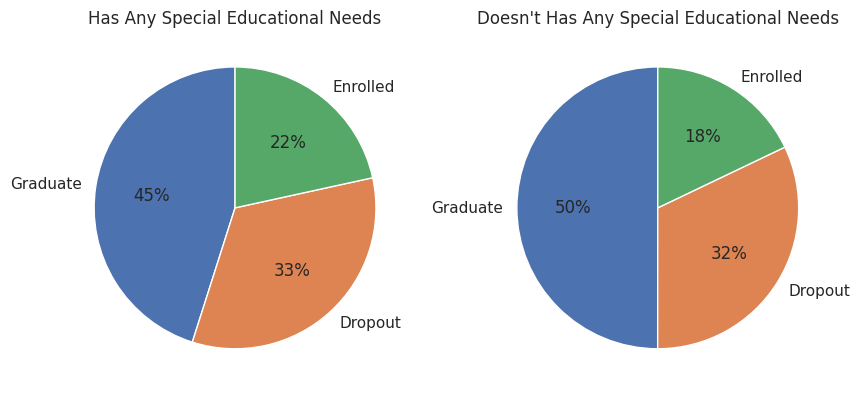

In [ ]:
# Buat dataframe yang berbeda untuk setiap kategori
df_edu_needs_0 = df[df['Educational special needs'] == 0]
df_edu_needs_1 = df[df['Educational special needs'] == 1]

# Hitung jumlah data setiap kategori
edu_needs_0_count = len(df_edu_needs_0)
edu_needs_1_count = len(df_edu_needs_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Has Any Educational special needs
target_counts_1 = df_edu_needs_1['Target'].value_counts()
ax1.pie(target_counts_1, labels=target_counts_1.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Has Any Special Educational Needs')

# Pie chart untuk Doesn't Has Any Educational special needs
target_counts_0 = df_edu_needs_0['Target'].value_counts()
ax2.pie(target_counts_0, labels=target_counts_0.index, autopct='%1.0f%%', startangle=90)
ax2.set_title("Doesn't Has Any Special Educational Needs")

plt.show()

Interpretasi

Baik mahasiswa yang memiliki kebutuhan khusus maupun tidak memiliki proporsi lulusan (Graduate) lebih banyak dibandingkan proporsi Dropoutnya. Artinya, **tidak ada perbedaan keberhasilan akademik yang signifikan antara mahasiswa yang memiliki kebutuhan khusus dan tidak**.

### Tuition

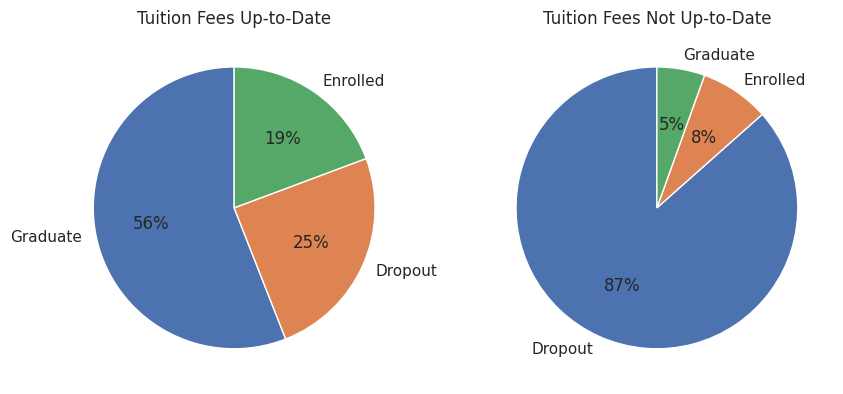

In [ ]:
# Buat dataframe yang berbeda untuk setiap kategori
df_tuition_0 = df[df['Tuition fees up to date'] == 0]
df_tuition_1 = df[df['Tuition fees up to date'] == 1]

# Hitung jumlah data setiap kategori
tuition_0_count = len(df_tuition_0)
tuition_1_count = len(df_tuition_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Tuition Fees Up-to-Date
target_counts_1 = df_tuition_1['Target'].value_counts()
ax1.pie(target_counts_1, labels=target_counts_1.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Tuition Fees Up-to-Date')

# Pie chart untuk Tuition Fees Not Up-to-Date
target_counts_0 = df_tuition_0['Target'].value_counts()
ax2.pie(target_counts_0, labels=target_counts_0.index, autopct='%1.0f%%', startangle=90)
ax2.set_title("Tuition Fees Not Up-to-Date")

plt.show()

Interpretasi

Hampir seluruh mahasiswa yang belum membayar UKT (tuition fees not up to date) mengalami dropout, hanya 13% yang tidak mengalami dropout. Artinya, **pembayaran UKT sangat mempengaruhi keberhasilan akademik, mahasiswa yang belum membayar UKT umumnya akan mengalami dropout**. Hal ini bisa terjadi karena biasanya terdapat peraturan pada universitas yang menyatakan bahwa mahasiswa yang bisa mengikuti kegitan perkuliahan adalah mahasiswa yang sudah membayar UKT.

### Debtor

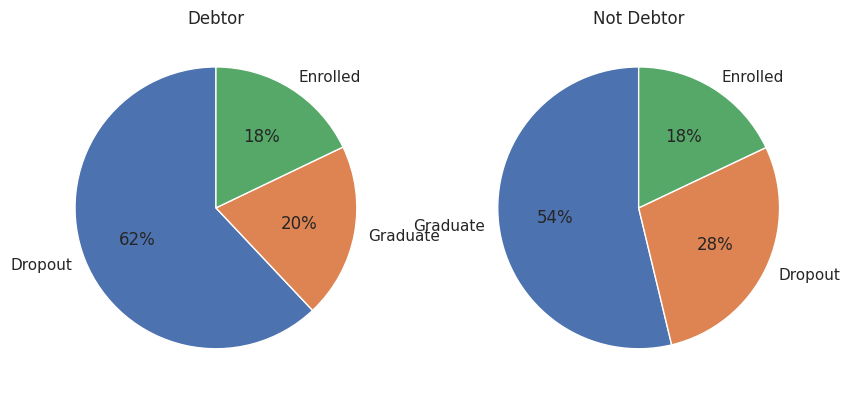

In [ ]:
# Buat dataframe yang berbeda untuk setiap kategori
df_debtor_0 = df[df['Debtor'] == 0]
df_debtor_1 = df[df['Debtor'] == 1]

# Hitung jumlah data setiap kategori
debtor_0_count = len(df_debtor_0)
debtor_1_count = len(df_debtor_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Debtor
target_counts_1 = df_debtor_1['Target'].value_counts()
ax1.pie(target_counts_1, labels=target_counts_1.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Debtor')

# Pie chart untuk Not Debtor
target_counts_0 = df_debtor_0['Target'].value_counts()
ax2.pie(target_counts_0, labels=target_counts_0.index, autopct='%1.0f%%', startangle=90)
ax2.set_title("Not Debtor")

plt.show()

Interpretasi

Hampir 2/3 mahasiswa yang memiliki utang mengalami dropout, sedangkan mahasiswa yang tidak memiliki utang proporsi lulusnya jauh lebih banyak dibandingkan proporsi dropout. Artinya, **utang mempengaruhi keberhasilan akademik mahasiswa, mahasiswa yang memiliki utang lebih berisiko mengalami dropout dibandingkan mahasiswa yang tidak memiliki utan**g. Hal ini bisa terjadi karena biasanya orang yang memiliki hutang tandanya ia memiliki kesulitan ekonomi yang membuatnya pada akhirnya akan kesulitan membayar UKT, seperti yang sudah diketahui sebelumnya bahwa mahasiswa yang belum membayar UKT memiliki risiko tinggi mengalami dropout.  

### Gender

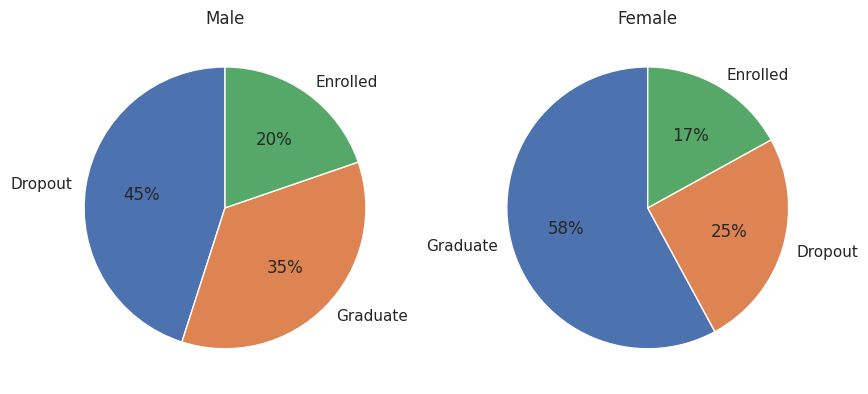

In [ ]:
# Buat dataframe yang berbeda untuk setiap kategori
df_male = df[df['Gender'] == 1]
df_female = df[df['Gender'] == 0]

# Hitung jumlah data setiap kategori
male_count = len(df_male)
female_count = len(df_female)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Male
target_counts_male = df_male['Target'].value_counts()
ax1.pie(target_counts_male, labels=target_counts_male.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Male')

# Pie chart untuk Female
target_counts_female = df_female['Target'].value_counts()
ax2.pie(target_counts_female, labels=target_counts_female.index, autopct='%1.0f%%', startangle=90)
ax2.set_title('Female')

plt.show()

Interpretasi

Dapat dilihat bahwa male memiliki proporsi dropout lebih tinggi dibandingkan graduate, sedangakan perempuan memiliki proporsi graduate yang lebih tinggi dibandingkan dropout. Artinya, **laki-laki cenderung lebih berisiko mengalami dropout dibandingkan perempuan**.

### Scholarship Holder

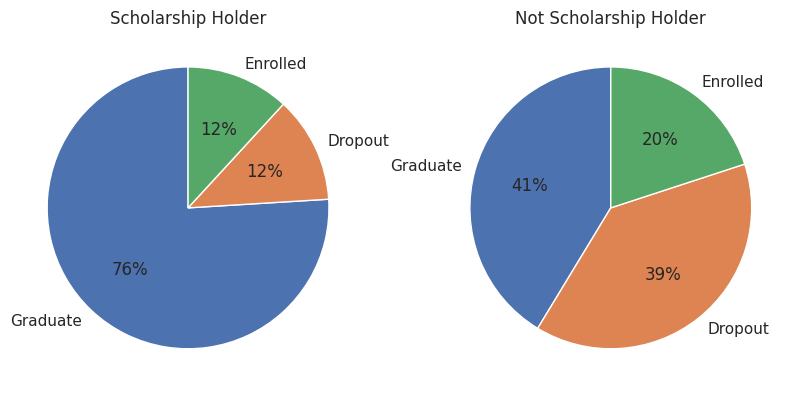

In [ ]:
# Buat dataframe yang berbeda untuk setiap kategori
df_scholarship_0 = df[df['Scholarship holder'] == 0]
df_scholarship_1 = df[df['Scholarship holder'] == 1]

# Hitung jumlah data setiap kategori
scholarship_0_count = len(df_scholarship_0)
scholarship_1_count = len(df_scholarship_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Scholarship Holder
target_counts_1 = df_scholarship_1['Target'].value_counts()
ax1.pie(target_counts_1, labels=target_counts_1.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Scholarship Holder')

# Pie chart untuk Not Scholarship Holder
target_counts_0 = df_scholarship_0['Target'].value_counts()
ax2.pie(target_counts_0, labels=target_counts_0.index, autopct='%1.0f%%', startangle=90)
ax2.set_title("Not Scholarship Holder")

plt.show()

Interpretasi

Mahasiswa yang merupakan pemegang beasiswa memiliki proporsi graduate jauh lebih besar dibandingkan dengan mahasiswa yang bukan merupakan pemegang beasiswa. Artinya, **mahasiswa yang bukan pemegang beasiswa lebih berisiko mengalami dropout dibandingkan dengan mahasiswa pemegang beasiswa**. Hal ini tentu wajar, mengingat mahasiswa pemegang beasiswa merupakan mahasiswa berprestasi yang memiliki kemampuan akademik yang bagus.

### Internationality

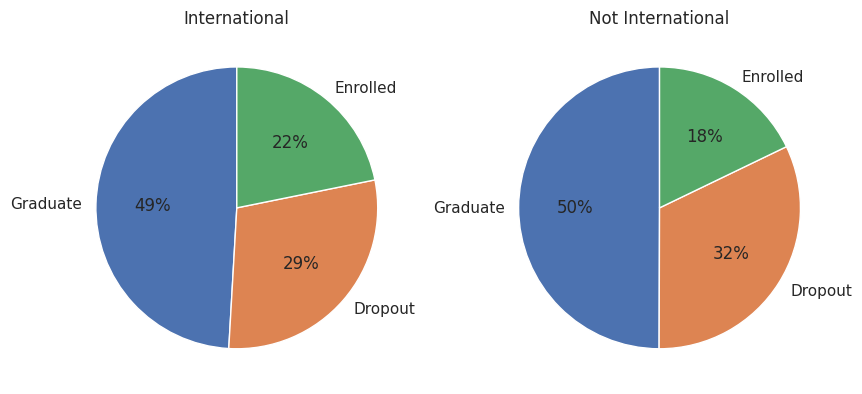

In [ ]:
# Buat dataframe yang berbeda untuk setiap kategori
df_international_0 = df[df['International'] == 0]
df_international_1 = df[df['International'] == 1]

# Hitung jumlah data setiap kategori
international_0_count = len(df_international_0)
international_1_count = len(df_international_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk International
target_counts_1 = df_international_1['Target'].value_counts()
ax1.pie(target_counts_1, labels=target_counts_1.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('International')

# Pie chart untuk Not International
target_counts_0 = df_international_0['Target'].value_counts()
ax2.pie(target_counts_0, labels=target_counts_0.index, autopct='%1.0f%%', startangle=90)
ax2.set_title("Not International")

plt.show()

Interpretasi

Dapat dilihat tidak ada perbedaan signifikan antara proporsi graduate dan dropout pada mahasiswa internasional maupun bukan. Artinya, **internationality tidak memberikan pengaruh signifikan dalam keberhasilan akademik mahasiswa atau bisa dibilang baik mahasiswa internasional maupun bukan memiliki risiko yang sama untuk mengalami dropout**.

#<font color="khaki">**Pre-Modelling**</font>


## Label Encoding

In [ ]:
categorical_features = df.select_dtypes(include=['object','category']).columns
categorical_features

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'International', 'Target'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk kolom kategorik
label_encoder = LabelEncoder()
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

Marital Status  Application mode  Application order  Course  \
0               0                 7                  5       1   
1               0                 5                  1      10   
2               0                 0                  5       4   
3               0                 7                  2      14   
4               1                11                  1       2   

   Daytime/evening attendance  Previous qualification  \
0                           1                       0   
1                           1                       0   
2                           1                       0   
3                           1                       0   
4                           0                       0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.804841            0                      12   
1                        2.076819            0                       0   
2                       -0.804841            0                      21   
3                       -0.804841            0                      22   
4                       -2.473171            0                      21   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                       9  ...                            -0.282442   
1                       2  ...                            -0.282442   
2                      26  ...                            -0.282442   
3                      26  ...                            -0.282442   
4                      27  ...                            -0.282442   

   Curricular units 2nd sem (enrolled)  \
0                            -2.838337   
1                            -0.105726   
2                            -0.105726   
3                            -0.105726   
4                            -0.105726   

   Curricular units 2nd sem (evaluations)  \
0                               -2.042630   
1                               -0.522682   
2                               -2.042630   
3                                0.490616   
4                               -0.522682   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                            -1.471527                         -1.963489   
1                             0.518904                          0.659562   
2                            -1.471527                         -1.963489   
3                             0.187165                          0.416450   
4                             0.518904                          0.531608   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                       -0.199441          -0.287638   
1                                       -0.199441           0.876222   
2                                       -0.199441          -0.287638   
3                                       -0.199441          -0.813253   
4                                       -0.199441           0.876222   

   Inflation rate       GDP  Target  
0        0.124386  0.765761       0  
1       -1.105222  0.347199       2  
2        0.124386  0.765761       0  
3       -1.466871 -1.375511       2  
4       -1.105222  0.347199       2  

[5 rows x 37 columns]

## Seleksi Fitur

In [ ]:
Y = df['Target']
X = df.drop(columns=['Target'])

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Menghitung Information Gain
info_gain = mutual_info_classif(X, Y, discrete_features=True)

# Membuat DataFrame untuk menampilkan hasil
info_gain_df = pd.DataFrame(info_gain, index=X.columns, columns=['Information Gain'])
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Menampilkan hasil
print("Information Gain for each feature:")
print(info_gain_df)

Information Gain for each feature:
                                                Information Gain
Curricular units 2nd sem (grade)                        0.356622
Curricular units 2nd sem (approved)                     0.316069
Curricular units 1st sem (grade)                        0.313520
Curricular units 1st sem (approved)                     0.246978
Admission grade                                         0.184582
Curricular units 2nd sem (evaluations)                  0.096403
Tuition fees up to date                                 0.091828
Curricular units 1st sem (evaluations)                  0.090263
Course                                                  0.066468
Previous qualification (grade)                          0.062744
Age at enrollment                                       0.062007
Application mode                                        0.052221
Curricular units 2nd sem (enrolled)                     0.050366
Curricular units 1st sem (enrolled)                    

Berdasarkan EDA dan Informasi Gain, kami memutuskan untuk menghapus fitur:  

*   Marital Status
- Unemployment rate
- GDP
- Nacionality
- Inflation rate
- International
- Education special needs

In [ ]:
df = df.drop(['Nacionality', 'Marital Status', 'International',
              'Educational special needs', 'Inflation rate',
              'GDP', 'Unemployment rate'], axis=1)

## Train and Test Splitting

Akan dilakukan pembagian data untuk training dan testing dengan 80% data training dan 20% data testing.

In [ ]:
Y = df['Target']
X = df.drop(columns=['Target'])

In [ ]:
# Bagi data menjadi data training dan testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

## Imbalanced Data

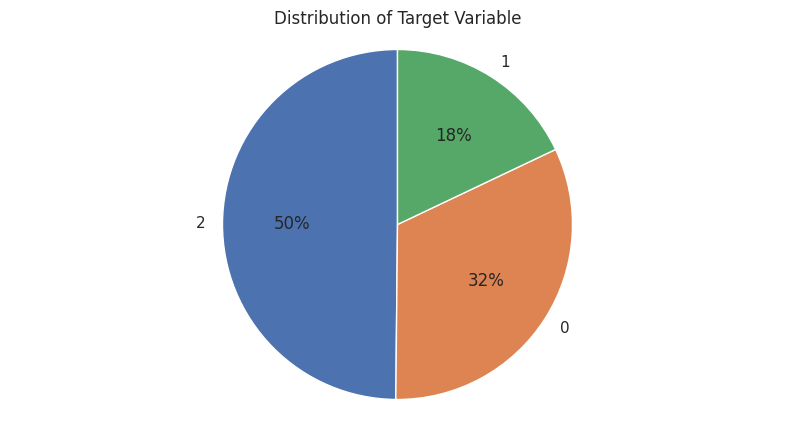

In [ ]:
target_counts = y_train.value_counts()

plt.figure(figsize=(10, 5))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.0f%%', startangle=90)
plt.title('Distribution of Target Variable')
plt.axis('equal')
plt.show()

Dapat dilihat bahwa data yang digunakan pada projek ini tidak seimbang.

Kategori:  
- 0 (Dropout) = 32%  
- 1 (Enrolled) = 18%  
- 2 (Graduate) = 50%  
  
Kategori Graduate lebih banyak jika dibandingkan Dropout dan Enrolled. Jika tidak ditangani, hal ini akan menyebabkan bias pada model prediktif, karena akan membuat model lebih condong memprediksi ke arah kategori Graduate.

### Random Over Sampling

In [ ]:
ros = RandomOverSampler(random_state=25)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("Original target distribution:")
print(y_train.value_counts())

print("\nResampled target distribution:")
print(y_train_resampled.value_counts())

Original target distribution:
Target
2    1764
0    1140
1     635
Name: count, dtype: int64

Resampled target distribution:
Target
2    1764
0    1764
1    1764
Name: count, dtype: int64


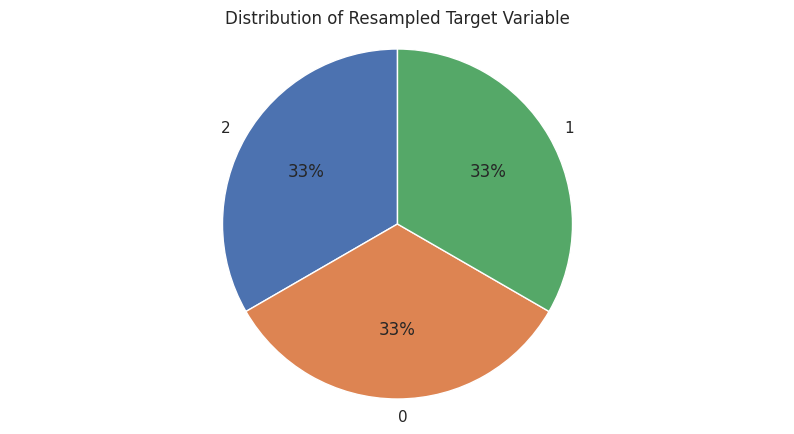

In [ ]:
target_counts = y_train_resampled.value_counts()

plt.figure(figsize=(10, 5))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.0f%%', startangle=90)
plt.title('Distribution of Resampled Target Variable')
plt.axis('equal')
plt.show()

Dapat dilihat distribusi dari setiap kelas/kategori sudah seimbang.

#<font color="khaki">**Modelling**</font>


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=7)  # Anda bisa mengubah n_neighbors untuk eksperimen

# Melatih model dengan data training
knn.fit(X_train_resampled, y_train_resampled)

# Memprediksi hasil pada data test
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung matriks kebingungan
cm = confusion_matrix(y_test, y_pred)

# Mencetak matriks kebingungan
print("Confusion Matrix:")
print(cm)

# Mencetak laporan klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[126  89  66]
 [ 28  84  47]
 [ 55 129 261]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.45      0.51       281
           1       0.28      0.53      0.36       159
           2       0.70      0.59      0.64       445

    accuracy                           0.53       885
   macro avg       0.53      0.52      0.51       885
weighted avg       0.59      0.53      0.55       885



Interpretasi:  
**Confusion Matrix**
1. Kelas 0 (Dropout)   
 - 126 data kelas 0 diprediksi benar sebagai kelas 0 (Drropout).  
 - 89 data kelas 0 salah diprediksi sebagai kelas 1 (Enrolled).
 - 66 data kelas 0 salah diprediksi sebagai kelas 2 (Graduate).  

2. Kelas 1 (Enrolled)   
 - 28 data kelas 1 salah diprediksi sebagai kelas 0.
 - 84 data kelas 1 diprediksi benar sebagai kelas 1.
 - 47 data kelas 1 salah diprediksi sebagai kelas 2.

3. Kelas 2 (Graduate)  
 - 55 data kelas 2 salah diprediksi sebagai kelas 0.
 - 129 data kelas 2 salah diprediksi sebagai kelas 1
 - 261 data kelas 2 diprediksi benar sebagai kelas 2

**Classification Report**  

1. Kinerja Kelas Individu  
 - Dropout (kelas 0)  
   Precision: 60%, Recall: 45%, F1-score: 51%
 - Enrolled (kelas 1)  
Precision: 28% (rendah), Recall: 53%,F1-score: 36% (buruk)
 - Graduate (kelas 2):
Precision: 70%, Recall: 59%, F1-score: 64% (terbaik di antara kelas lain).

2. Akurasi Keseluruhan  
53% (model memprediksi dengan benar dalam 53% kasus).

3. Rata-rata Performa  
 - Macro Average (tanpa mempertimbangkan jumlah data di tiap kelas)  
 Precision: 53%, Recall: 52%, F1-score: 51%
 - Weighted Average (berdasarkan jumlah data per kelas)  
Precision: 59%, Recall: 53%, F1-score: 55%.
---



Kesimpulan  

Kinerja Model Secara Umum:  
- Model bekerja cukup baik pada kelas Graduate (kelas 2) dengan precision dan recall yang lebih tinggi.
- Kinerja model buruk pada kelas Enrolled (kelas 1), terlihat dari precision (28%) dan F1-score (36%) yang rendah.

Ketidakseimbangan Kelas:
- Meskipun resampling telah dilakukan, ketidakseimbangan mungkin masih berdampak pada kinerja, khususnya untuk kelas dengan sedikit representasi (kelas 1).

## Regresi Logistik

In [ ]:
reglog = LogisticRegression().fit(X_train_resampled, y_train_resampled)
y_reglog = reglog.predict(X_test)
print(confusion_matrix(y_test, y_reglog))
print(classification_report(y_test, y_reglog))

[[193  57  31]
 [ 21 105  33]
 [ 17  70 358]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.75       281
           1       0.45      0.66      0.54       159
           2       0.85      0.80      0.83       445

    accuracy                           0.74       885
   macro avg       0.71      0.72      0.71       885
weighted avg       0.77      0.74      0.75       885



Kinerja Keseluruhan
- Model mencapai akurasi 74% pada data uji, yang cukup baik untuk model dasar.
- Namun, performa bervariasi antar kelas, menunjukkan potensi bias model terhadap kelas tertentu (kelas 2 - Graduate).

Kelas 0 (Dropout)
- Recall: 69%, artinya 69% dari siswa yang sebenarnya Dropout berhasil dikenali.
- Precision: 84%, cukup baik, namun ada kesalahan model yang salah mengklasifikasikan kelas ini ke kelas lain (false negatives).

Kelas 1 (Enrolled):
- Recall: 66%, menunjukkan lebih dari setengah siswa yang Enrolled dikenali dengan benar.
- Precision: 45%, rendah, mengindikasikan banyak prediksi untuk kelas ini salah (false positives).

Kelas 2 (Graduate):
- Recall: 80%, sangat baik, menunjukkan sebagian besar siswa Graduate terklasifikasi dengan benar.
- Precision: 85%, menunjukkan model sangat andal dalam memprediksi siswa yang lulus.

---

Kesimpulan

- Model lebih andal mengenali siswa yang Graduate dibandingkan dengan siswa yang Dropout atau Enrolled.
- Performa untuk kelas 1 (Enrolled) masih lemah, dengan precision dan f1-score yang lebih rendah, sehingga butuh perbaikan (misalnya, penyesuaian bobot kelas atau penggunaan model lebih kompleks).

## Naive Bayes

In [ ]:
# Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html

gnb = GaussianNB()
nbc = gnb.fit(X_train_resampled, y_train_resampled)
y_nb = nbc.predict(X_test)

print(confusion_matrix(y_test, y_nb))
print(classification_report(y_test, y_nb))

[[192  45  44]
 [ 30  69  60]
 [ 30  67 348]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       281
           1       0.38      0.43      0.41       159
           2       0.77      0.78      0.78       445

    accuracy                           0.69       885
   macro avg       0.64      0.63      0.63       885
weighted avg       0.70      0.69      0.69       885



Kinerja Keseluruhan  
- Akurasi: Model mencapai 69% akurasi pada data uji, sedikit lebih rendah dibandingkan regresi logistik (74%).
- Macro Average (F1-Score: 0.63): Menunjukkan performa rata-rata pada semua kelas tidak terlalu baik, terutama karena rendahnya kinerja pada kelas 1 (Enrolled).  


Performa Berdasarkan Kelas  
- **Kelas 0 (Dropout)**
 - Recall: 68%, artinya 68% dari siswa yang benar-benar Dropout berhasil dikenali oleh model.
 - Precision: 76%, cukup baik, tetapi ada 24% dari prediksi kelas ini salah (false positives).
 - F1-Score: 0.72, menunjukkan model cukup baik mengenali siswa Dropout, meskipun masih ada ruang untuk perbaikan.

- **Kelas 1 (Enrolled)**
 - Recall: 43%, menunjukkan model gagal mengenali lebih dari setengah siswa yang benar-benar Enrolled.
 - Precision: 38%, sangat rendah, artinya banyak prediksi kelas ini yang salah (false positives).
 - F1-Score: 0.41, menunjukkan performa untuk kelas ini masih lemah.

- **Kelas 2 (Graduate)**
 - Recall: 78%, menunjukkan sebagian besar siswa Graduate dikenali dengan benar.
 - Precision: 77%, cukup baik, dengan proporsi kesalahan prediksi yang kecil.
 - F1-Score: 0.78, menunjukkan model bekerja cukup baik untuk mengenali kelas ini.
   
---

Kesimpulan  
1. Model Naive Bayes memiliki performa yang lebih lemah dibanding regresi logistik, terutama pada kelas 1 (Enrolled), di mana precision dan recall sangat rendah.
2. Kelas 2 (Graduate) kembali menjadi kelas yang paling mudah dikenali, dengan precision dan recall yang cukup tinggi.
3. Kelas 0 (Dropout) memiliki performa yang cukup baik, tetapi masih di bawah regresi logistik.
4. Ketidakseimbangan data mungkin tetap menjadi tantangan, meskipun sudah dilakukan resampling, karena model berbasis probabilitas seperti Naive Bayes cenderung kesulitan menangani distribusi yang tidak merata.

## Decision Tree

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = DecisionTreeClassifier(random_state = 25)

# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(X_train_resampled, y_train_resampled)
y_DT1 = DT.predict(X_test)

print(confusion_matrix(y_test, y_DT1))
print(classification_report(y_test, y_DT1))

[[206  38  37]
 [ 46  64  49]
 [ 48  59 338]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       281
           1       0.40      0.40      0.40       159
           2       0.80      0.76      0.78       445

    accuracy                           0.69       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.69      0.69      0.69       885



Kinerja Keseluruhan  

- Akurasi: Model mencapai 69%, setara dengan Naive Bayes, tetapi lebih rendah dibanding regresi logistik (74%).
- Macro Average (F1-Score: 0.63): Sama seperti Naive Bayes, performa rata-rata pada semua kelas cukup rendah, dengan kelas 1 (Enrolled) sebagai penyumbang terbesar kelemahan.


Performa Berdasarkan Kelas  
- Kelas 0 (Dropout)  
 - Recall: 73%, menunjukkan bahwa sebagian besar siswa Dropout berhasil dikenali dengan benar.
 - Precision: 69%, cukup baik, tetapi ada 31% dari prediksi kelas ini salah (false positives).
 - F1-Score: 0.71, menunjukkan keseimbangan precision dan recall yang baik untuk kelas ini.
- Kelas 1 (Enrolled)  
 - Recall: 40%, berarti lebih dari setengah siswa yang benar-benar Enrolled tidak dikenali dengan baik.
 - Precision: 40%, sangat rendah, menunjukkan banyak prediksi untuk kelas ini yang salah.
 - F1-Score: 0.40, mengindikasikan performa yang sangat lemah untuk kelas ini.
- Kelas 2 (Graduate)  
 - Recall: 76%, menunjukkan model mampu mengenali sebagian besar siswa Graduate dengan benar.
 - Precision: 80%, cukup baik, dengan proporsi kesalahan yang kecil.
 - F1-Score: 0.78, menunjukkan model bekerja cukup baik pada kelas ini.

---

Kesimpulan  

1. Kelas 2 (Graduate) tetap menjadi kelas yang paling mudah dikenali oleh model.
2. Kelas 0 (Dropout) memiliki performa yang cukup baik dengan precision dan recall yang seimbang.
3. Kelas 1 (Enrolled) kembali menjadi tantangan terbesar, dengan precision dan recall yang rendah, serupa dengan hasil pada Naive Bayes.

In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

array([0.01415752, 0.02221516, 0.03179627, 0.00094482, 0.00371475,
       0.04296339, 0.02925435, 0.0150688 , 0.0442186 , 0.03020517,
       0.05953021, 0.00563584, 0.00986666, 0.04536016, 0.00876041,
       0.01613973, 0.04078554, 0.01330499, 0.00855617, 0.04576147,
       0.02946949, 0.05562832, 0.00908166, 0.00139147, 0.03697595,
       0.03467261, 0.28828315, 0.04960779, 0.00664955])

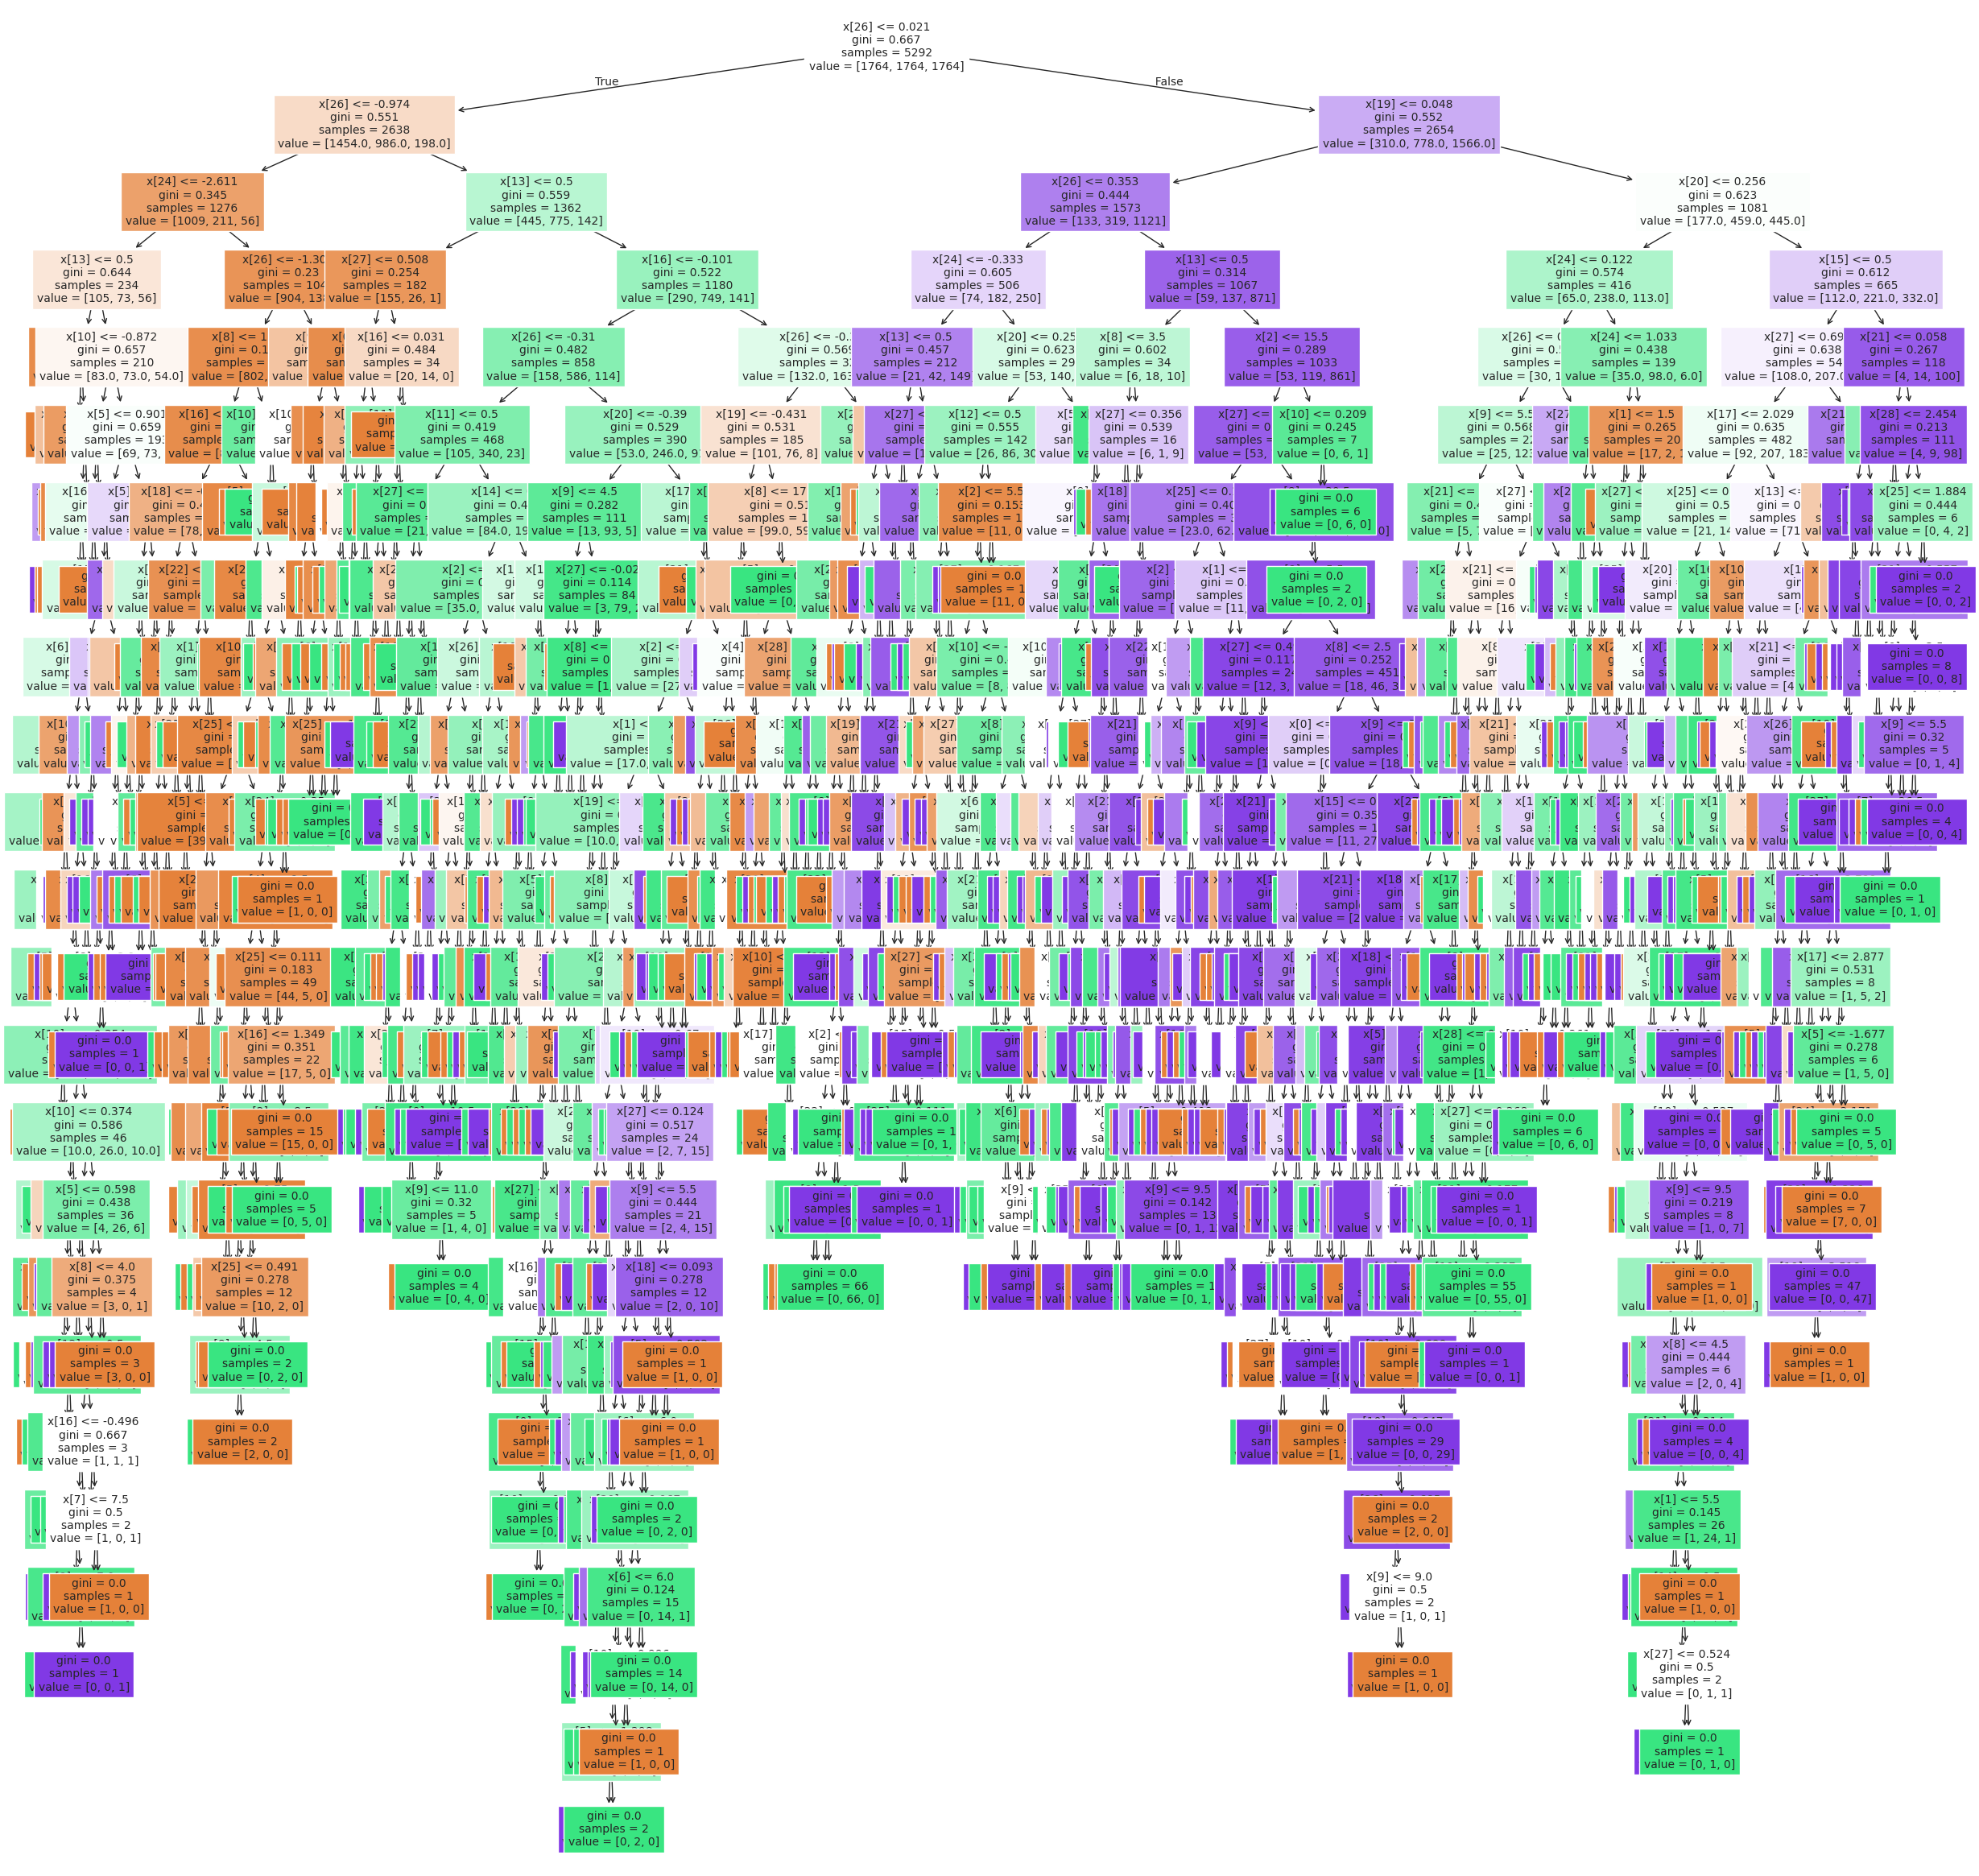

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=25)
clf = clf.fit(X_train_resampled, y_train_resampled)

# Mengatur ukuran plot
plt.figure(figsize=(30, 30))  # Ubah angka untuk menyesuaikan ukuran (lebar, tinggi)
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=25)
rf.fit(X_train_resampled, y_train_resampled)
y_rf1 = rf.predict(X_test)

print(confusion_matrix(y_test, y_rf1))
print(classification_report(y_test, y_rf1))

[[206  33  42]
 [ 32  80  47]
 [ 14  35 396]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       281
           1       0.54      0.50      0.52       159
           2       0.82      0.89      0.85       445

    accuracy                           0.77       885
   macro avg       0.72      0.71      0.72       885
weighted avg       0.77      0.77      0.77       885



Kinerja Keseluruhan  
- Akurasi: Model mencapai 77%, sedikit lebih baik daripada regresi logistik (74%) dan lebih tinggi dibandingkan Naive Bayes dan Decision Tree (69%).
- Macro Average (F1-Score: 0.72): Menunjukkan performa rata-rata pada semua kelas cukup baik, dengan peningkatan signifikan dibandingkan model sebelumnya.
- Weighted Average (F1-Score: 0.77): Dengan mempertimbangkan distribusi data, model bekerja cukup baik secara keseluruhan.

Performa Berdasarkan Kelas  

**Kelas 0 (Dropout)**  
- Recall: 73%, artinya 73% dari siswa yang benar-benar Dropout berhasil dikenali oleh model.
- Precision: 82%, cukup baik, dengan hanya 18% prediksi Dropout yang salah.
- F1-Score: 0.77, menunjukkan keseimbangan precision dan recall yang baik.

**Kelas 1 (Enrolled)**  
- Recall: 50%, menunjukkan bahwa model masih sulit mengenali setengah siswa yang benar-benar Enrolled.
- Precision: 54%, relatif lebih baik dibandingkan Naive Bayes dan Decision Tree, tetapi masih ada banyak false positives.
- F1-Score: 0.52, menunjukkan bahwa kelas ini tetap menjadi tantangan bagi model.

**Kelas 2 (Graduate)**
- Recall: 89%, sangat tinggi, menunjukkan sebagian besar siswa Graduate dikenali dengan benar.
- Precision: 82%, cukup baik, dengan proporsi kesalahan prediksi yang kecil.
- F1-Score: 0.85, performa terbaik di antara semua kelas.

---

Kesimpulan  
1. Kelas 2 (Graduate): Tetap menjadi kelas yang paling mudah dikenali oleh model, dengan recall dan precision yang sangat tinggi.
2. Kelas 0 (Dropout): Performanya meningkat dibandingkan model lain, menunjukkan kemampuan Random Forest untuk menangani kelas ini dengan baik.
3. Kelas 1 (Enrolled): Meskipun ada peningkatan dibandingkan model sebelumnya, kelas ini masih sulit dikenali, dengan precision dan recall yang lebih rendah.

Feature ranking:
1. feature Curricular units 2nd sem (approved) (0.125467)
2. feature Curricular units 2nd sem (grade) (0.104421)
3. feature Curricular units 1st sem (approved) (0.079349)
4. feature Curricular units 1st sem (grade) (0.068074)
5. feature Admission grade (0.053505)
6. feature Curricular units 2nd sem (evaluations) (0.048723)
7. feature Previous qualification (grade) (0.048397)
8. feature Age at enrollment (0.046669)
9. feature Curricular units 1st sem (evaluations) (0.043236)
10. feature Tuition fees up to date (0.041510)
11. feature Course (0.037956)
12. feature Father's occupation (0.037853)
13. feature Mother's occupation (0.033386)
14. feature Mother's qualification (0.028549)
15. feature Father's qualification (0.027073)
16. feature Application mode (0.024700)
17. feature Curricular units 2nd sem (enrolled) (0.022794)
18. feature Curricular units 1st sem (enrolled) (0.022450)
19. feature Application order (0.018729)
20. feature Scholarship holder (0.015720)
21. feat

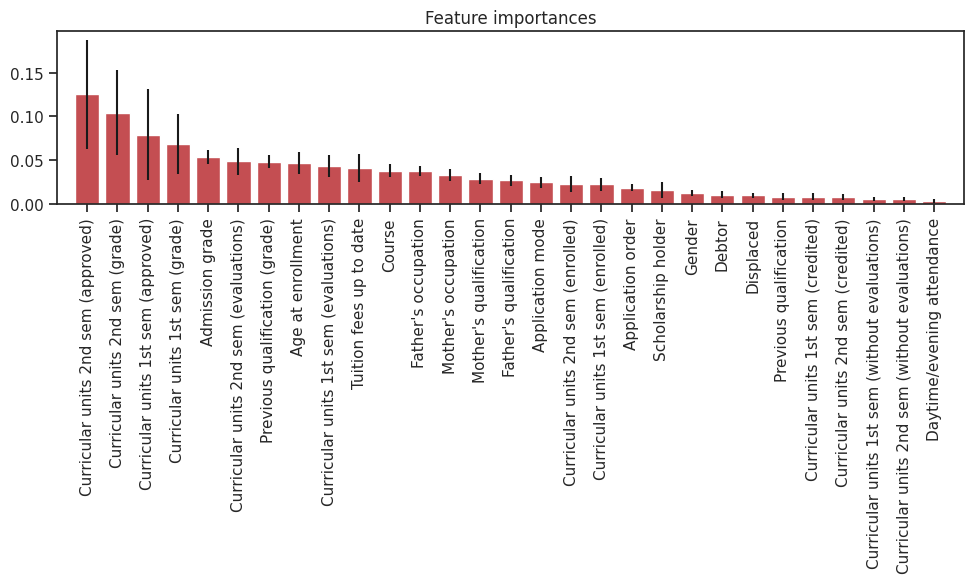

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Membuat model SVM
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train_resampled, y_train_resampled)

# Melakukan prediksi
y_svm = svm.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_svm))


Confusion Matrix:
[[164  75  42]
 [ 14 105  40]
 [ 24  79 342]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.58      0.68       281
           1       0.41      0.66      0.50       159
           2       0.81      0.77      0.79       445

    accuracy                           0.69       885
   macro avg       0.67      0.67      0.66       885
weighted avg       0.74      0.69      0.70       885



Kinerja Keseluruhan  
- Akurasi: Model mencapai akurasi 69%, yang sebanding dengan Naive Bayes dan Decision Tree, tetapi masih di bawah Random Forest (77%).
- Macro Average F1-Score (0.66): Menunjukkan performa rata-rata pada semua kelas cukup baik, tetapi tidak terlalu unggul.
- Weighted Average F1-Score (0.70): Dengan mempertimbangkan distribusi data, performanya menunjukkan model masih cenderung lebih baik mengenali kelas mayoritas.  

Performa Berdasarkan Kelas  

**Kelas 0 (Dropout)**
- Precision: 81%, menunjukkan prediksi Dropout cukup akurat.
- Recall: 58%, artinya hanya 58% dari siswa Dropout yang benar-benar dikenali oleh model.
- F1-Score: 0.68, menunjukkan ada trade-off antara precision dan recall. Model masih kehilangan beberapa siswa Dropout.

**Kelas 1 (Enrolled)**
- Precision: 41%, menunjukkan banyak false positives pada prediksi kelas ini.
- Recall: 66%, cukup tinggi dibandingkan model lain, menunjukkan model lebih sensitif terhadap siswa Enrolled.
- F1-Score: 0.50, menunjukkan performa yang masih cukup rendah pada kelas ini, meskipun recall lebih tinggi.

**Kelas 2 (Graduate)**
- Precision: 81%, cukup tinggi untuk prediksi Graduate.
- Recall: 77%, artinya sebagian besar siswa Graduate dikenali dengan baik.
- F1-Score: 0.79, menunjukkan performa yang seimbang untuk kelas ini.
---

Kesimpulan  
1. Kelas 0 (Dropout): Precision tinggi, tetapi recall masih kurang memadai dibandingkan Random Forest.
2. Kelas 1 (Enrolled): Recall yang lebih baik dibandingkan model lain, tetapi precision masih rendah, menunjukkan model sering salah memprediksi kelas ini.
3. Kelas 2 (Graduate): Model SVM bekerja sangat baik pada kelas Graduate, serupa dengan model Random Forest.

#<font color="khaki">**Cross Validaton**</font>


###kNN

In [ ]:
# Cross validation
# Perhatikan variabelnya, kita sekarang menggunakan seluruh data
# namun sebaiknya hanya Train data (jika datanya cukup besar)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
n_neighbors=7
weights='distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
mulai = time.time()
scores_kNN = cross_val_score(kNN, X, Y, cv=10)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy k-NN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

Accuracy k-NN: 0.62 (+/- 0.04), Waktu = 0.578 detik


0.5882352941176471

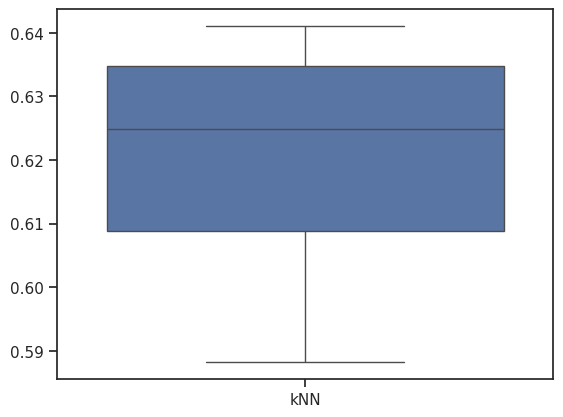

In [ ]:
# Visualisasi untuk mengevaluasi model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN})
p = sns.boxplot(data = df_)
min(scores_kNN)

###Regresi Logistik

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, X, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.77 (+/- 0.03), Waktu = 1.856 detik


kNN       0.588235
RegLog    0.746606
dtype: float64

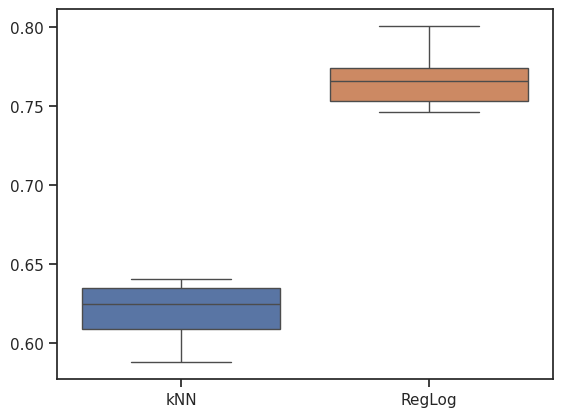

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

###Naive Bayes

In [ ]:
mulai = time.time()
scores_nb = cross_val_score(nbc, X, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Naive Bayes: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nb.mean(), scores_nb.std() * 2, waktu))

Accuracy Naive Bayes: 0.71 (+/- 0.03), Waktu = 0.118 detik


kNN         0.588235
RegLog      0.746606
NaiveBys    0.690745
dtype: float64

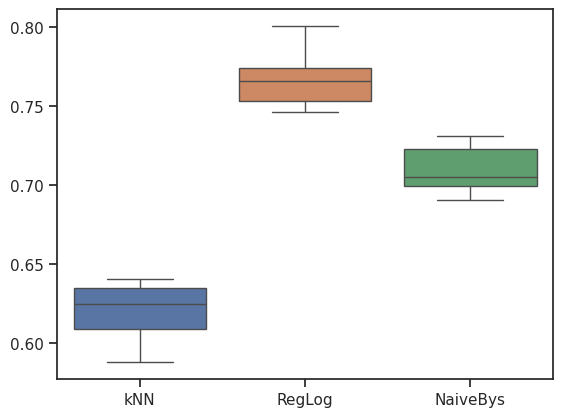

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb})
p = sns.boxplot(data = df_)
df_.min()

###Decision Tree

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, X, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.67 (+/- 0.03), Waktu = 0.534 detik


kNN         0.588235
RegLog      0.746606
NaiveBys    0.690745
DecTree     0.653846
dtype: float64

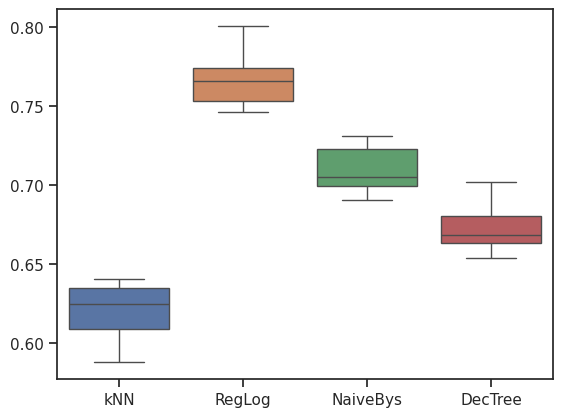

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

###Random Forest

In [ ]:
mulai = time.time()
scores_rf = cross_val_score(rf, X, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Random Forest: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_rf.mean(), scores_rf.std() * 2, waktu))

Accuracy Random Forest: 0.77 (+/- 0.03), Waktu = 9.007 detik


kNN         0.588235
RegLog      0.746606
NaiveBys    0.690745
DecTree     0.653846
Forest      0.755656
dtype: float64

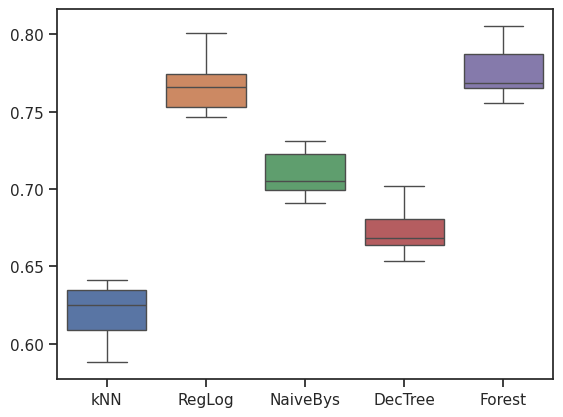

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt, "Forest": scores_rf})
p = sns.boxplot(data = df_)
df_.min()

###SVM

In [ ]:
svm = SVC(kernel='rbf', random_state=0)
mulai = time.time()
scores_svm = cross_val_score(svm, X, Y, cv=10)
waktu = time.time() - mulai
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Accuracy SVM: 0.72 (+/- 0.02), Waktu = 10.622 detik


kNN         0.588235
RegLog      0.746606
NaiveBys    0.690745
DecTree     0.653846
Forest      0.755656
dtype: float64

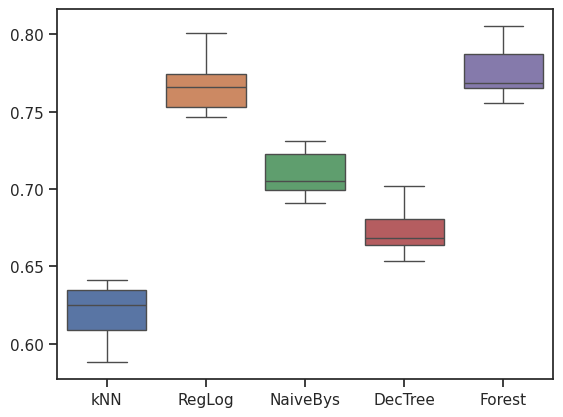

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt, "Forest": scores_rf})
p = sns.boxplot(data = df_)
df_.min()

#<font color="khaki">**Hyperparameter Tuning**</font>

In [ ]:
# Define models and hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs', 'saga']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    })
}

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Perform hyperparameter tuning
best_params = {}
best_scores = {}
for model_name, (model, params) in models.items():
    if params:  # Skip models without hyperparameters
        grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)
        best_params[model_name] = grid_search.best_params_
        best_scores[model_name] = grid_search.best_score_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best score for {model_name}: {grid_search.best_score_}")
    else:
        # Train Naive Bayes directly since it has no hyperparameters
        model.fit(X_train_resampled, y_train_resampled)
        best_params[model_name] = "Default"
        best_scores[model_name] = model.score(X_test, y_test)  # Evaluate directly on test data

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters for Logistic Regression: {'C': 100, 'solver': 'saga'}
Best score for Logistic Regression: 0.7218442693913543
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.8582919649917621
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.9159223935267246


In [ ]:
# Train final models with best parameters
final_models = {}
for model_name, (model, params) in models.items():
    if model_name in best_params and best_params[model_name] != "Default":
        model.set_params(**best_params[model_name])
    model.fit(X_train_resampled, y_train_resampled)
    final_models[model_name] = model

# Evaluate models on test data
for model_name, model in final_models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Confusion Matrix:
[[193  57  31]
 [ 20 105  34]
 [ 17  70 358]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       281
           1       0.45      0.66      0.54       159
           2       0.85      0.80      0.82       445

    accuracy                           0.74       885
   macro avg       0.71      0.72      0.71       885
weighted avg       0.77      0.74      0.75       885


Model: Decision Tree
Confusion Matrix:
[[209  38  34]
 [ 49  58  52]
 [ 47  61 337]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       281
           1       0.37      0.36      0.37       159
           2       0.80      0.76      0.78       445

    accuracy                           0.68       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.68      0.68      0.68       885


Model: Random

### Interpretasi Hyperparameter Tuning

## **1. Logistic Regression**
- **Best Parameters**:
  - `C`: 100.
  - `solver`: saga.
- **Kinerja Model**:
  - kurasi: 74%
  - **Precision tertinggi untuk kelas 0 (Dropout) dan kelas 2 (Graduate)**: menunjukkan model lebih baik dalam membedakan keduanya.
  - Recall kelas **1 (Enrolled)** masih cukup rendah.
  - Logistic Regression menunjukkan performa yang lebih stabil dibanding KNN, tetapi tidak untuk kelas Enrolled.

## **2. Decision Tree**
- **Best Parameters**:
  - `max_depth`: None (tidak dibatasi).
  - `min_samples_split`: 2.
  - `min_samples_leaf`: 1.
- **Kinerja Model**:
  - Akurasi: 68%
  - Precision untuk kelas **1 (Enrolled)** rendah, dan recall untuk kelas **2 (Graduate)** cukup baik.
  - Decision Tree menangani data dengan baik tetapi membutuhkan optimasi lebih lanjut untuk meningkatkan akurasi pada kelas tertentu.

## **3. Random Forest**
- **Best Parameters**:
  - `n_estimators`: 200 (jumlah pohon).
  - `max_depth`: 30.
  - `min_samples_split`: 2.
  - `min_samples_leaf`: 1.
- **Kinerja Model**:
  - Akurasi: 77%
  - Precision dan recall untuk semua kelas relatif tinggi, terutama kelas **2 (Graduate)**.
  - Random Forest adalah model terbaik dengan performa paling stabil dan akurat.

1.  **Random Forest** memiliki performa terbaik dengan akurasi tertinggi (77%) dan kinerja yang stabil di semua kelas.
2. **Masalah pada Kelas Enrolled**
  Hampir semua model kesulitan dalam memprediksi kelas **1 (Enrolled)** karena distribusi data yang mungkin tumpang tindih atau tidak mencukupi

#<font color="khaki">**Ensemble Model**</font>


## **Alasan Memilih Model**
1. **Logistic Regression**:
     - Logistic Regression adalah model linear yang cukup sederhana.
     - Model ini bekerja baik pada dataset dengan hubungan linear antar fitur.
     - Logistic Regression menjadi baseline untuk menangkap pola **linear** dalam data.
     - Meskipun sederhana, Logistic Regression memberikan performa stabil dengan akurasi 74% pada dataset ini.

2. **Random Forest**:
     - Random Forest adalah model non-linear berbasis ensemble yang sangat kuat.
     - Menggabungkan banyak decision tree untuk **mengurangi overfitting** dan **menangani hubungan non-linear** dalam data.
     - Random Forest adalah model terbaik dalam eksperimen ini dengan akurasi 77%.
     - Dapat menangkap pola non-linear yang tidak bisa ditangkap oleh Logistic Regression.

3. **Decision Tree**:
     - Decision Tree bersifat interpretatif dan menangkap hubungan non-linear.
     - Sering menjadi "partner" dalam ensemble karena memberikan hasil yang berbeda dari model ensemble seperti Random Forest.
     - Decision Tree memberikan akurasi 68%, menunjukkan kemampuan menangkap pola yang tidak ditangkap Logistic Regression.
     - Namun, tidak sekuat Random Forest dalam hal stabilitas.


In [ ]:
from sklearn.ensemble import StackingClassifier

# Definisikan model-model base
base_models = [
    ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)),
    ('Logistic Regression', LogisticRegression(C=10, solver='saga', max_iter=1000))
]

# Meta-learner menggunakan Logistic Regression
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Latih model stacking pada data resampled
stacking_model.fit(X_train_resampled, y_train_resampled)

# Evaluasi model stacking pada data test
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Ensemble Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stacking))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacking))


Stacking Ensemble Accuracy: 0.7694915254237288

Confusion Matrix:
 [[222  12  47]
 [ 50  41  68]
 [ 18   9 418]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       281
           1       0.66      0.26      0.37       159
           2       0.78      0.94      0.85       445

    accuracy                           0.77       885
   macro avg       0.74      0.66      0.67       885
weighted avg       0.76      0.77      0.74       885



Hasil dari **Stacking Ensemble** menunjukkan peningkatan akurasi hingga **77%**, yang hampir menyamai performa terbaik dari **Random Forest** sebelumnya.

### **Interpretasi Hasil Stacking Ensemble**
1. **Akurasi Keseluruhan: 77%**
   - Stacking Ensemble berhasil mengintegrasikan kekuatan model base (Random Forest, Decision Tree, Logistic Regression) dengan meta-learner Logistic Regression.
   - Hal ini menunjukkan bahwa meta-learner mampu belajar pola kombinasi prediksi dari model-model base dengan baik.

2. **Kinerja per Kelas**:
   - **Dropout (0)**:
     - Precision: **0.77**, Recall: **0.79**, F1-Score: **0.78**.
     - Kinerja cukup baik dengan prediksi dropout yang akurat.
   - **Enrolled (1)**:
     - Precision: **0.70**, Recall: **0.26**, F1-Score: **0.38**.
     - Meskipun precision meningkat, recall tetap rendah (26%), menunjukkan model masih kesulitan menangkap pola untuk kelas ini.
   - **Graduate (2)**:
     - Precision: **0.78**, Recall: **0.94**, F1-Score: **0.86**.
     - Model bekerja sangat baik untuk kelas ini, yang mendominasi dataset.

3. **Rata-Rata Metrik**:
   - **Macro Average** (tanpa mempertimbangkan distribusi data):
     - Precision: **0.75**, Recall: **0.67**, F1-Score: **0.67**.
     - Recall lebih rendah karena kelas Enrolled memiliki performa yang buruk.
   - **Weighted Average** (mempertimbangkan distribusi data):
     - Precision: **0.76**, Recall: **0.77**, F1-Score: **0.75**.
     - Ini menunjukkan bahwa model menangani kelas Graduate dengan baik, tetapi masih ada bias terhadap kelas dominan.

Jadi, ensemble model memiliki
1. **Keunggulan**:
   - Stacking Ensemble memberikan hasil yang hampir sebaik Random Forest, tetapi dengan distribusi prediksi yang lebih terintegrasi dari berbagai model.
   - Precision meningkat pada kelas Enrolled dibandingkan metode sebelumnya.

2. **Kelemahan**:
   - Recall untuk kelas **Enrolled (1)** tetap rendah (26%), menunjukkan model masih kesulitan menangani kelas yang minoritas dan memiliki distribusi yang kompleks.

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(X_train_resampled, y_train_resampled)

y_ada = ada.predict(X_test)
print(confusion_matrix(y_test, y_ada))
print(classification_report(y_test, y_ada))

[[196  55  30]
 [ 27 100  32]
 [ 20  73 352]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       281
           1       0.44      0.63      0.52       159
           2       0.85      0.79      0.82       445

    accuracy                           0.73       885
   macro avg       0.70      0.71      0.69       885
weighted avg       0.76      0.73      0.74       885



Kinerja Keseluruhan  
- Akurasi: Model mencapai 73% akurasi pada data uji
- Macro Average (F1-Score: 0.69): Menunjukkan performa rata-rata pada semua kelas tidak terlalu baik, terutama karena rendahnya kinerja pada kelas 1 (Enrolled).  


Performa Berdasarkan Kelas  
- **Kelas 0 (Dropout)**
 - Recall: 70%, artinya 70% dari siswa yang benar-benar Dropout berhasil dikenali oleh model.
 - Precision: 81%, cukup baik, tetapi ada 19% dari prediksi kelas ini salah (false positives).
 - F1-Score: 0.75 menunjukkan model cukup baik mengenali siswa Dropout, meskipun masih ada ruang untuk perbaikan.

- **Kelas 1 (Enrolled)**
 - Recall: 63%, artinya 63% dari siswa yang benar-benar Dropout berhasil dikenali oleh model.
 - Precision: 44%, sangat rendah, artinya banyak prediksi kelas ini yang salah (false positives).
 - F1-Score: 0.52, menunjukkan performa untuk kelas ini masih lemah.

- **Kelas 2 (Graduate)**
 - Recall: 79%, menunjukkan sebagian besar siswa Graduate dikenali dengan benar.
 - Precision: 85%, cukup baik, dengan proporsi kesalahan prediksi yang kecil.
 - F1-Score: 0.82, menunjukkan model bekerja cukup baik untuk mengenali kelas ini.

#<font color="khaki">**Kesimpulan dan Saran**</font>

Berdasarkan proses klasifikasi yang sudah kami lakukan, berikut kesimpulan yang dapat kami ambil:

*   Terdapat beberapa variabel pada dataset yang tidak berpengaruh secara signifikan terhadap keberhasilan akademik mahasiswa, seperti variabel yang berhubungan dengan faktor ekonomi wilayah.
*   Variabel yang paling berpengaruh dalam keberhasilan akademik mahasiswa adalah variabel-variabel yang berhubungan dengan nilai dan jumlah sks. Semakin kecil nilai, maka akan semakin berisiko mengalami dropout.
*   Model yang paling bagus untuk mengklasifikasi keberhasilan mahasiswa diantara semua model yang kami gunakan adalah Model Random Forest dengan parameter terbaik n_estimators: 200 (jumlah pohon), max_depth: 30, min_samples_split: 2, dan min_samples_leaf: 1. Model ini memiliki akurasi 77%, lebih tinggi dibandingkan model lainnya.
*   Kategori keberhasilan akademik yang paling sulit diprediksi adalah enrolled.

Berikut merupakan saran dan rekomendasi yang dapat kami berikan:

*  Untuk Model
   - Membuat fitur engineering baru, seperti interaksi beberapa fitur, dll untuk menambah akurasi model
   - Jika ingin melakukan klasifikasi menggunakan model regresi, lebih baik menangani variabel-variabel yang menyebabkan multikolinearitas terlebih dahulu.
   - Mencoba menggunakan teknik resample lain.
   - Mungkin bisa dipertimbangkan untuk menghapus baris dengan kategori enrolled selain karena sulit untuk memprediksi kategori ini, kategori ini juga bukan merupakan kategori yang ingin diteliti dalam projek ini. Atau mengubah target menjadi 0 untuk tidak dropout dan 1 untuk dropout. Hal ini dilakukan agar model lebih dapat fokus memahami kriteria klasifikasi untuk kategori dropout.
   - Mencari model lain yang mungkin lebih sesuai untuk mengklasifikasi data ini.

*  Untuk Perguruan Tinggi
   - Memberi kesempatan remedial atau memberikan tugas tambahan bagi mahasiswa dengan nilai rendah.
   - Menempatkan asisten dosen pada setiap mata kuliah untuk memberikan bimbingan tambahan, agar membantu mahasiswa dalam memahami materi kuliah.
   - Memberi keringanan UKT kepada mahasiswa kurang mampu, sehingga tidak ada mahasiswa yang dropout kuliah karena kendala UKT.
   - Membarikan reward kepada mahasiswa dengan nilai atau IP semester tertinggi sehingga lebih memacu mahasiswa untuk meningkatkan nilainya.



